In [1]:
# Importing necessary libraries
!pip install pandasql
import pandas as pd
import pandasql as ps

# Loading the CSV files again to ensure we're starting from scratch
customer_demo_path = '/Users/jai/Desktop/Soothsayer/Usecase_DemadForecasting1/CustomerDemographics.csv'
product_info_path = '/Users/jai/Desktop/Soothsayer/Usecase_DemadForecasting1/ProductInfo.csv'
transaction_01_path = '/Users/jai/Desktop/Soothsayer/Usecase_DemadForecasting1/Transactional_data_retail_01.csv'
transaction_02_path = '/Users/jai/Desktop/Soothsayer/Usecase_DemadForecasting1/Transactional_data_retail_02.csv'

# Reading the CSV files
customer_demo_df = pd.read_csv(customer_demo_path)
product_info_df = pd.read_csv(product_info_path)
transaction_01_df = pd.read_csv(transaction_01_path)
transaction_02_df = pd.read_csv(transaction_02_path)

# Combining the two transactional datasets into one
transaction_combined_df = pd.concat([transaction_01_df, transaction_02_df], ignore_index=True)

# Running SQL join query to combine all datasets
query = """
SELECT t.*, p.Description, c.Country
FROM transaction_combined_df t
LEFT JOIN product_info_df p ON t.StockCode = p.StockCode
LEFT JOIN customer_demo_df c ON t.`Customer ID` = c.`Customer ID`
"""

# Running the query using pandasql
result_df = ps.sqldf(query, locals())

# Displaying the first few rows of the result to confirm the join worked correctly
result_df.head()


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=442b49e28ad6f589eaffcdaba6befa8a6b0820372e8830c9945ce2b4923f4ddf
  Stored in directory: /Users/jai/Library/Caches/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


Invoice StockCode  Quantity  Price  Customer ID       InvoiceDate  \
0  489434     85048        12   6.95      13085.0  01 December 2021   
1  489434    79323P        12   6.75      13085.0  01 December 2021   
2  489434    79323P        12   6.75      13085.0  01 December 2021   
3  489434    79323P        12   6.75      13085.0  01 December 2021   
4  489434    79323W        12   6.75      13085.0  01 December 2021   

                           Description         Country  
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS  United Kingdom  
1                                 None  United Kingdom  
2                   PINK CHERRY LIGHTS  United Kingdom  
3               Unsaleable, destroyed.  United Kingdom  
4                                 None  United Kingdom

In [2]:
result_df.shape


(2115559, 8)

In [1]:

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customer_stats_query = """
SELECT c.Country, COUNT(DISTINCT t.`Customer ID`) AS total_customers,
       SUM(t.Quantity * t.Price) AS total_revenue,
       AVG(t.Quantity) AS avg_quantity_per_customer
FROM transaction_combined_df t
LEFT JOIN customer_demo_df c ON t.`Customer ID` = c.`Customer ID`
GROUP BY c.Country
"""
customer_stats_df = ps.sqldf(customer_stats_query, locals())
print(customer_stats_df)


          Country  total_customers  total_revenue  avg_quantity_per_customer
0            None             5893   1.784733e+07                   9.585187
1       Australia                2   1.098491e+04                  10.608018
2         Belgium                1   5.284580e+03                   8.047273
3          France                2   3.829071e+04                  13.179775
4     Netherlands                1   7.777500e+02                  14.000000
5             USA                1   1.410000e+02                   1.000000
6  United Kingdom               42   1.384437e+06                  24.221912


In [4]:
product_stats_query = """
SELECT p.Description, SUM(t.Quantity) AS total_quantity_sold,
       SUM(t.Quantity * t.Price) AS total_revenue
FROM transaction_combined_df t
LEFT JOIN product_info_df p ON t.StockCode = p.StockCode
GROUP BY p.Description
ORDER BY total_quantity_sold DESC
LIMIT 10
"""
product_stats_df = ps.sqldf(product_stats_query, locals())
print(product_stats_df)


                          Description  total_quantity_sold  total_revenue
0                                None              3719242   8.556173e+06
1                                   ?               457231   1.242084e+06
2                               check               433813   6.839175e+05
3                             damaged               213968   7.809888e+05
4                             missing               208384   4.387197e+05
5                             damages               192385   7.518536e+05
6                              dotcom               122113   1.457917e+05
7   WORLD WAR 2 GLIDERS ASSTD DESIGNS               108545   2.489822e+04
8         wrongly marked carton 22804                96066   2.537200e+05
9  WHITE HANGING HEART T-LIGHT HOLDER                96066   2.537200e+05


In [5]:
result_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115559 entries, 0 to 2115558
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Invoice      object 
 1   StockCode    object 
 2   Quantity     int64  
 3   Price        float64
 4   Customer ID  float64
 5   InvoiceDate  object 
 6   Description  object 
 7   Country      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 129.1+ MB


In [6]:
# Fill missing Customer ID with a placeholder
result_df['Customer ID'].fillna(-1, inplace=True)


In [7]:
# Filling missing Description values with "Unknown"
result_df['Description'].fillna('Unknown', inplace=True)


In [8]:
result_df

Invoice StockCode  Quantity  Price  Customer ID       InvoiceDate  \
0        489434     85048        12   6.95      13085.0  01 December 2021   
1        489434    79323P        12   6.75      13085.0  01 December 2021   
2        489434    79323P        12   6.75      13085.0  01 December 2021   
3        489434    79323P        12   6.75      13085.0  01 December 2021   
4        489434    79323W        12   6.75      13085.0  01 December 2021   
...         ...       ...       ...    ...          ...               ...   
2115554  581587     22138         3   4.95      12680.0        09-12-2023   
2115555  581587     22138         3   4.95      12680.0        09-12-2023   
2115556  581587     22138         3   4.95      12680.0        09-12-2023   
2115557  581587      POST         1  18.00      12680.0        09-12-2023   
2115558  581587      POST         1  18.00      12680.0        09-12-2023   

                                 Description         Country  
0        15CM CHRISTMAS GLASS BALL 20 LIGHTS  United Kingdom  
1                                    Unknown  United Kingdom  
2                         PINK CHERRY LIGHTS  United Kingdom  
3                     Unsaleable, destroyed.  United Kingdom  
4                                    Unknown  United Kingdom  
...                                      ...             ...  
2115554        BAKING SET 9 PIECE RETROSPOT             None  
2115555                              damages            None  
2115556                               mouldy            None  
2115557                              Unknown            None  
2115558                              POSTAGE            None  

[2115559 rows x 8 columns]

In [9]:
# Detecting outliers in Quantity and Price using IQR
Q1 = result_df[['Quantity', 'Price']].quantile(0.25)
Q3 = result_df[['Quantity', 'Price']].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers only in the Quantity and Price columns
outliers_quantity = (result_df['Quantity'] < (Q1['Quantity'] - 1.5 * IQR['Quantity'])) | (result_df['Quantity'] > (Q3['Quantity'] + 1.5 * IQR['Quantity']))
outliers_price = (result_df['Price'] < (Q1['Price'] - 1.5 * IQR['Price'])) | (result_df['Price'] > (Q3['Price'] + 1.5 * IQR['Price']))

# Summing up the outliers to get an idea of how many there are
print(f"Outliers in Quantity: {outliers_quantity.sum()}")
print(f"Outliers in Price: {outliers_price.sum()}")


Outliers in Quantity: 233619
Outliers in Price: 171547


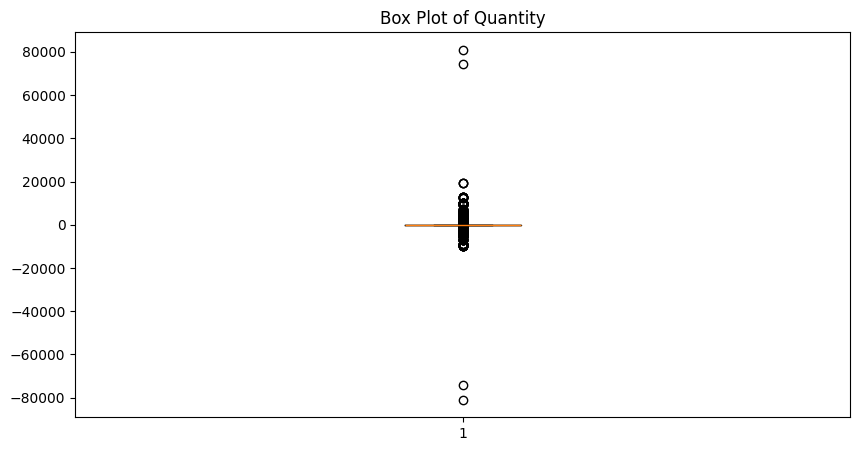

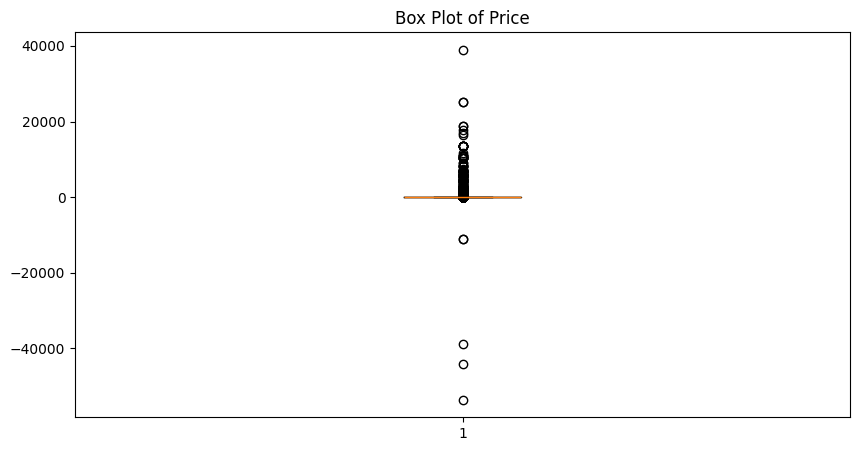

In [10]:
import matplotlib.pyplot as plt

# Box plot for Quantity
plt.figure(figsize=(10, 5))
plt.boxplot(result_df['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()

# Box plot for Price
plt.figure(figsize=(10, 5))
plt.boxplot(result_df['Price'])
plt.title('Box Plot of Price')
plt.show()


In [11]:
# Displaying the first few rows of Quantity outliers
quantity_outliers_df = result_df[outliers_quantity]
print(quantity_outliers_df.head())

# Displaying the first few rows of Price outliers
price_outliers_df = result_df[outliers_price]
print(price_outliers_df.head())

# Removing Quantity and Price outliers
filtered_df = result_df[~outliers_quantity & ~outliers_price]

# Checking the size of the dataset after removing the outliers
filtered_df.shape

   Invoice StockCode  Quantity  Price  Customer ID       InvoiceDate  \
8   489434     22041        48   2.10      13085.0  01 December 2021   
9   489434     21232        24   1.25      13085.0  01 December 2021   
10  489434     21232        24   1.25      13085.0  01 December 2021   
11  489434     22064        24   1.65      13085.0  01 December 2021   
12  489434     21871        24   1.25      13085.0  01 December 2021   

                       Description         Country  
8     RECORD FRAME 7" SINGLE SIZE   United Kingdom  
9   STRAWBERRY CERAMIC TRINKET BOX  United Kingdom  
10  STRAWBERRY CERAMIC TRINKET POT  United Kingdom  
11      PINK DOUGHNUT TRINKET POT   United Kingdom  
12                         Unknown  United Kingdom  
   Invoice StockCode  Quantity  Price  Customer ID       InvoiceDate  \
82  489437     21360         1   9.95      15362.0  01 December 2021   
83  489437     21360         1   9.95      15362.0  01 December 2021   
84  489437     21360         1   

(1713321, 8)

### EDA

In [12]:
# Customer-level EDA: Total revenue per customer
customer_revenue = filtered_df.groupby('Customer ID')[['Quantity', 'Price']].apply(lambda x: (x['Quantity'] * x['Price']).sum()).reset_index(name='TotalRevenue')
print(customer_revenue.head())


   Customer ID  TotalRevenue
0         -1.0    2859547.70
1      12346.0        674.99
2      12347.0       6524.00
3      12348.0        209.20
4      12349.0       5921.88


In [13]:
# Product-level EDA: Top 10 products by total quantity sold
top_products = filtered_df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)
print(top_products)


     StockCode  Quantity
4371    85123A    138880
4342    85099B    108208
613      21181     81448
248      20713     69165
4056     84879     63915
1645     22384     55212
1473     22197     53688
3532    82494L     50565
1644     22383     47445
258      20725     41740


/var/folders/8k/gr5hh85x7218kd7_c3bjm22m0000gn/T/ipykernel_20140/2326708279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['InvoiceDate'] = pd.to_datetime(filtered_df['InvoiceDate'], errors='coerce', dayfirst=True)


Number of invalid dates: 833182


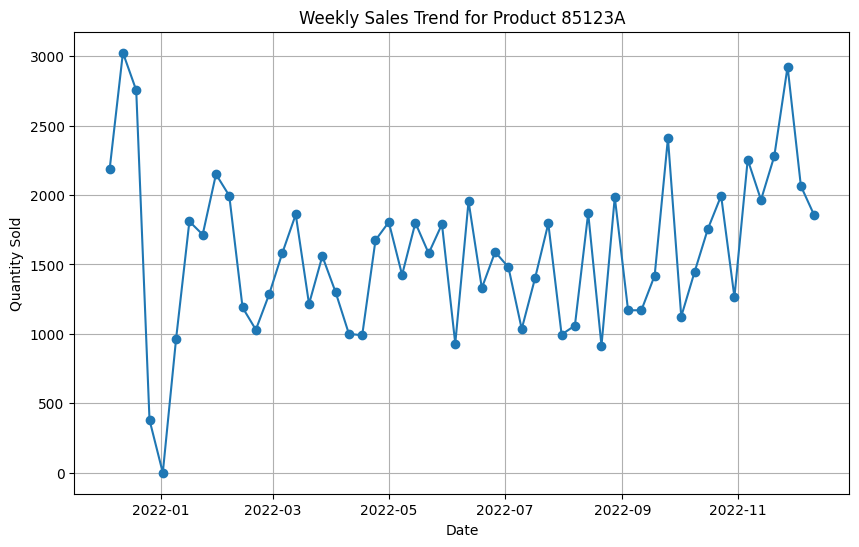

In [14]:
# Convert InvoiceDate to datetime, handling different formats
filtered_df['InvoiceDate'] = pd.to_datetime(filtered_df['InvoiceDate'], errors='coerce', dayfirst=True)

# Check for rows with invalid dates (optional)
invalid_dates = filtered_df[filtered_df['InvoiceDate'].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")

# Drop rows with invalid dates (optional, depending on how you want to handle them)
filtered_df = filtered_df.dropna(subset=['InvoiceDate'])

# Resample sales by week for each product and sum the quantity
weekly_sales = filtered_df.set_index('InvoiceDate').groupby('StockCode').resample('W')['Quantity'].sum().reset_index()

# Visualizing the time-series trend for a specific product
import matplotlib.pyplot as plt

# Ensure top_products exists or fetch the top-selling products
top_products = filtered_df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

# Get the top product's StockCode
top_product_code = top_products['StockCode'].iloc[0]

# Filter weekly sales for the top product
product_sales = weekly_sales[weekly_sales['StockCode'] == top_product_code]

# Plotting the weekly sales trend
plt.figure(figsize=(10, 6))
plt.plot(product_sales['InvoiceDate'], product_sales['Quantity'], marker='o')
plt.title(f"Weekly Sales Trend for Product {top_product_code}")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.show()


In [15]:
# Top 10 products by total revenue (Quantity * Price)
top_10_revenue_products = filtered_df.groupby('StockCode').apply(lambda x: (x['Quantity'] * x['Price']).sum()).reset_index(name='TotalRevenue').sort_values(by='TotalRevenue', ascending=False).head(10)
print(top_10_revenue_products)


     StockCode  TotalRevenue
3694    85123A     260191.00
220      20685     130728.80
973      21621     120403.45
3665    85099B     107540.44
606      21181      96767.68
1394     22139      86663.75
2876    82494L      85609.05
2505     47566      80631.39
243      20713      76548.87
2552     48138      61096.20


In [16]:
# Aggregating data by week for each product
weekly_sales_df = filtered_df.set_index('InvoiceDate').groupby(['StockCode', pd.Grouper(freq='W')])['Quantity'].sum().reset_index()


### PROPHET EVALUATION (Time Series Evaluation)

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 9.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


/Users/jai/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
13:29:08 - cmdstanpy - INFO - Chain [1] start processing
13:29:10 - cmdstanpy - INFO - Chain [1] done processing


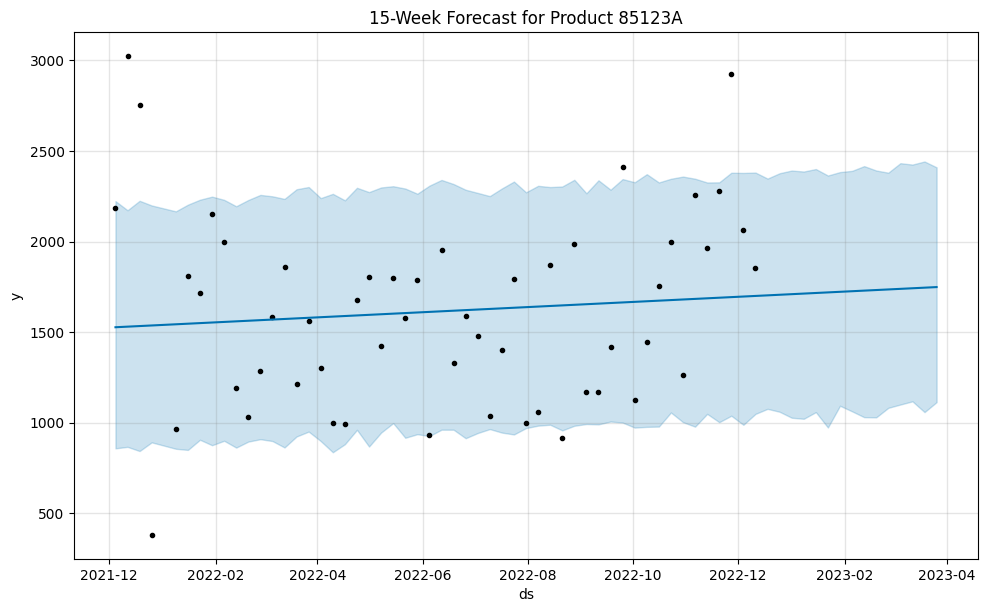

In [17]:
!pip install prophet
from prophet import Prophet

# Prepare data for Prophet
product_sales = weekly_sales_df[weekly_sales_df['StockCode'] == top_product_code]
product_sales = product_sales.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'})

# Initialize and fit Prophet model
model = Prophet()
model.fit(product_sales)

# Forecast the next 15 weeks
future = model.make_future_dataframe(periods=15, freq='W')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title(f"15-Week Forecast for Product {top_product_code}")
plt.show()



In [18]:
from sklearn.metrics import mean_squared_error

# Evaluate the model performance on the historical data
predictions = forecast['yhat'][:-15]  # Using historical data for comparison
true_values = product_sales['y']
rmse = mean_squared_error(true_values, predictions, squared=False)
print(f"RMSE: {rmse}")


/Users/jai/Library/Python/3.9/lib/python/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RMSE: 529.019766770905


13:29:29 - cmdstanpy - INFO - Chain [1] start processing
13:29:29 - cmdstanpy - INFO - Chain [1] done processing


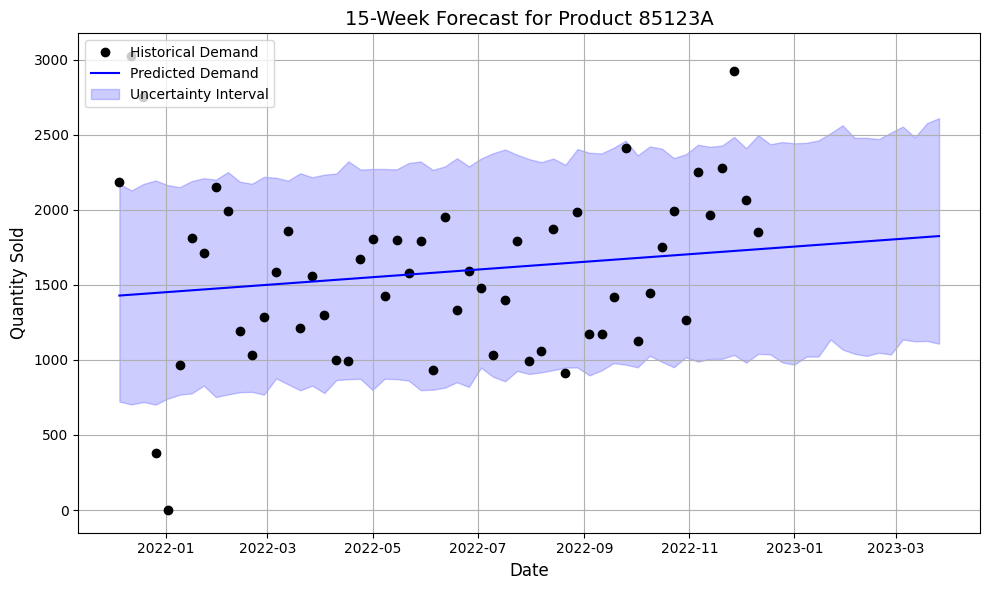

13:29:30 - cmdstanpy - INFO - Chain [1] start processing
13:29:30 - cmdstanpy - INFO - Chain [1] done processing


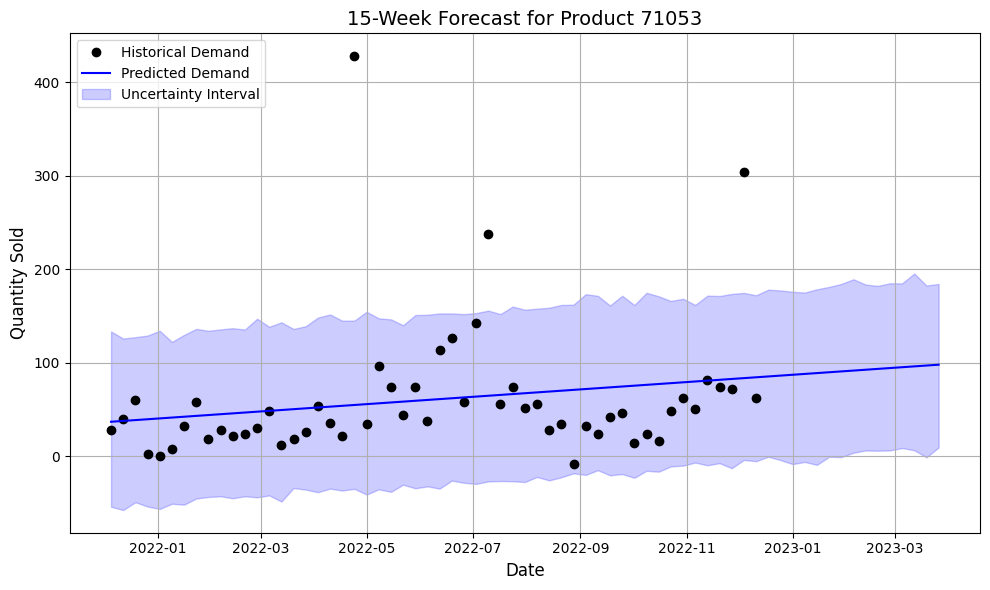

13:29:30 - cmdstanpy - INFO - Chain [1] start processing
13:29:30 - cmdstanpy - INFO - Chain [1] done processing


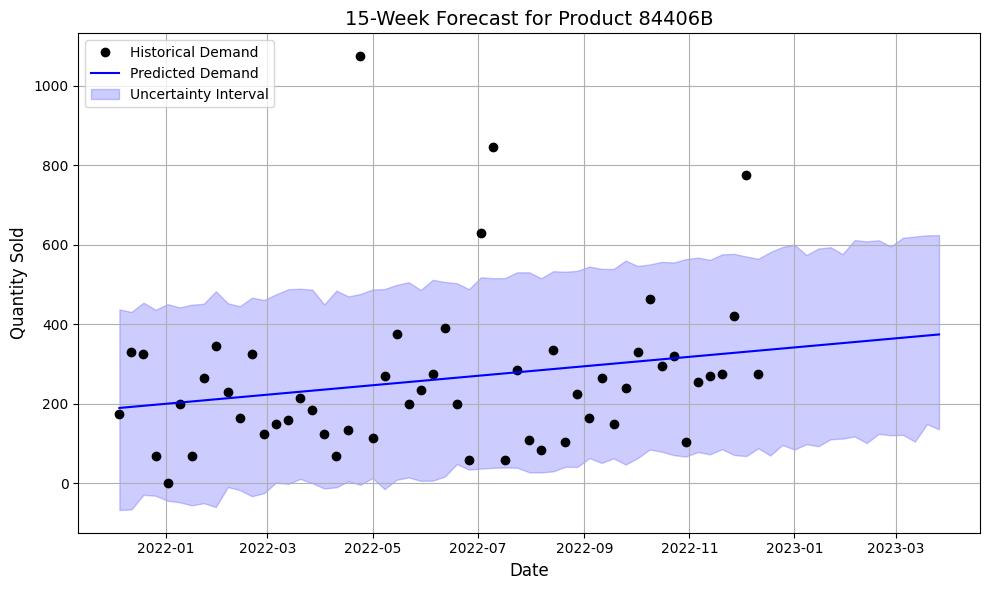

13:29:31 - cmdstanpy - INFO - Chain [1] start processing
13:29:31 - cmdstanpy - INFO - Chain [1] done processing


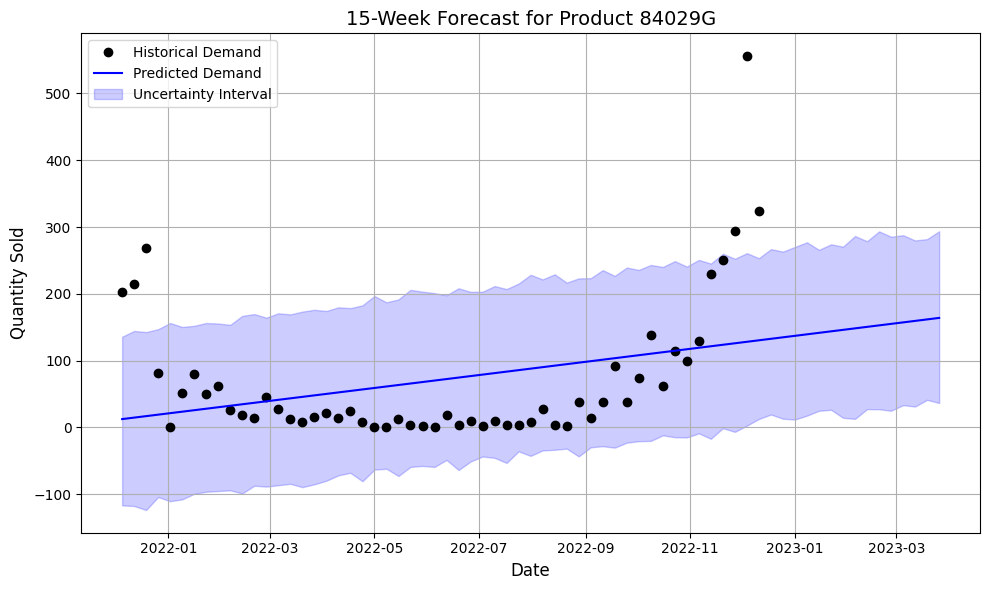

13:29:32 - cmdstanpy - INFO - Chain [1] start processing
13:29:32 - cmdstanpy - INFO - Chain [1] done processing


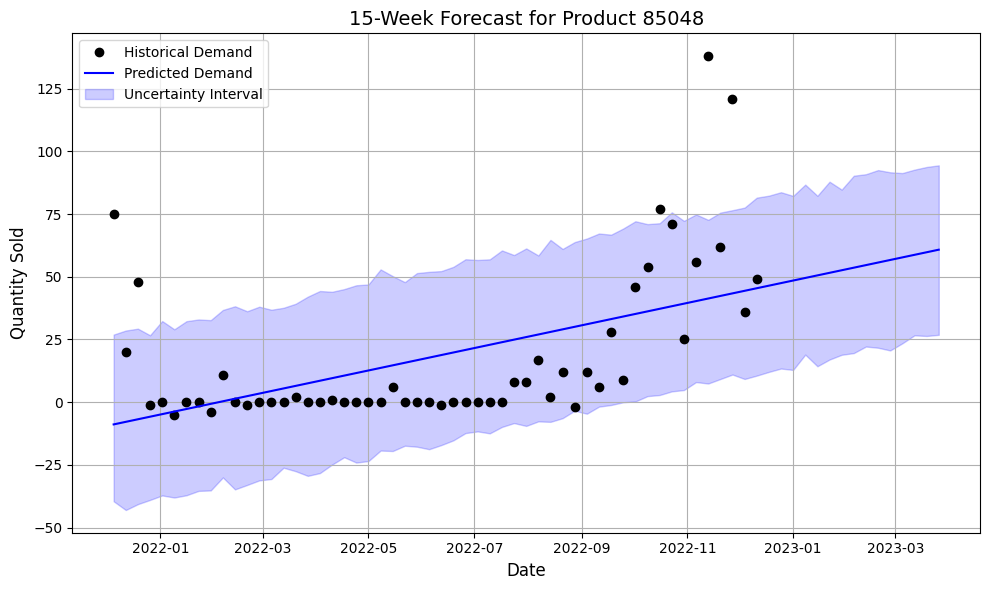

13:29:33 - cmdstanpy - INFO - Chain [1] start processing
13:29:33 - cmdstanpy - INFO - Chain [1] done processing


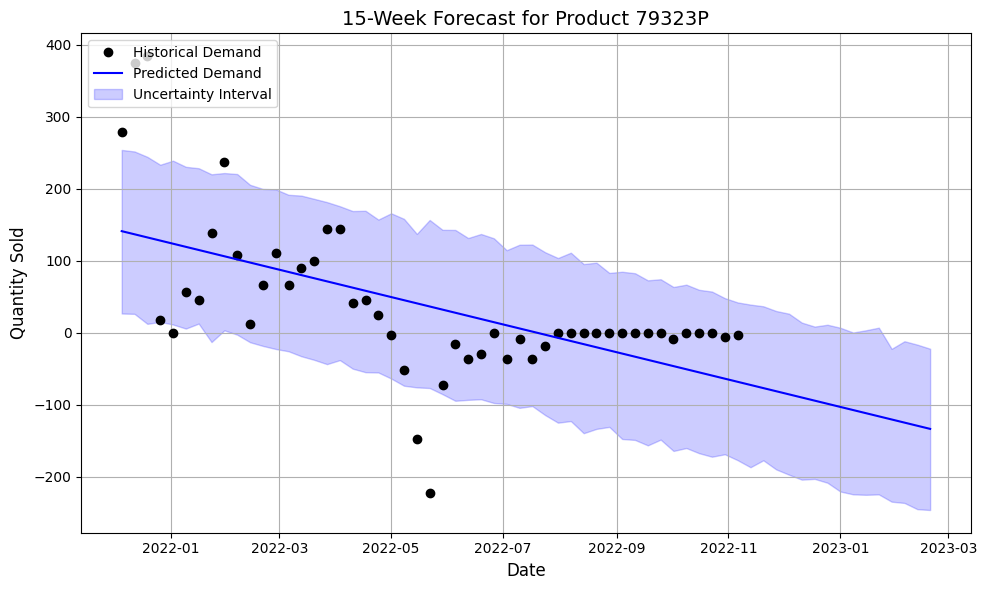

13:29:34 - cmdstanpy - INFO - Chain [1] start processing
13:29:34 - cmdstanpy - INFO - Chain [1] done processing


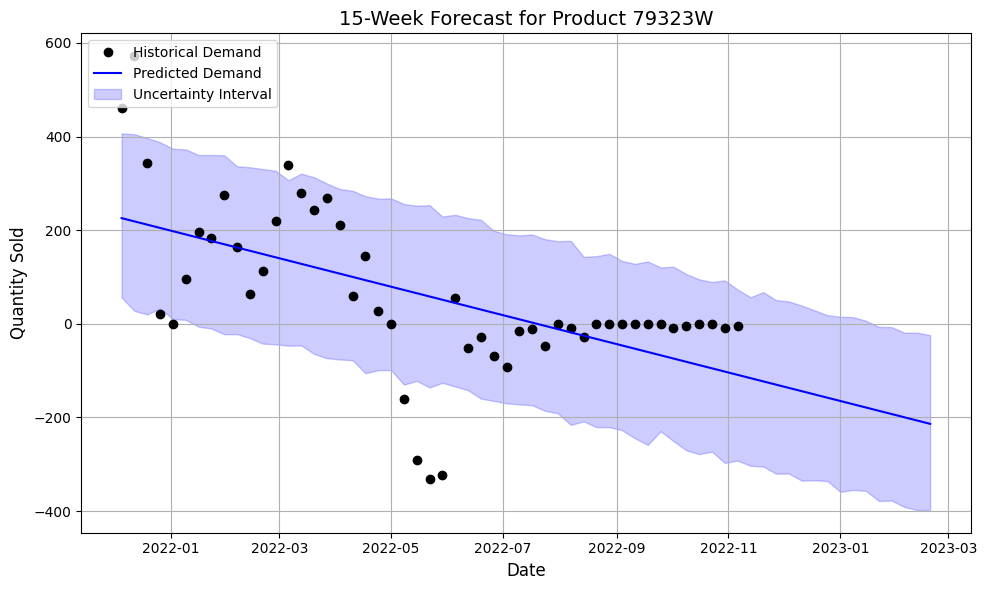

13:29:34 - cmdstanpy - INFO - Chain [1] start processing
13:29:34 - cmdstanpy - INFO - Chain [1] done processing


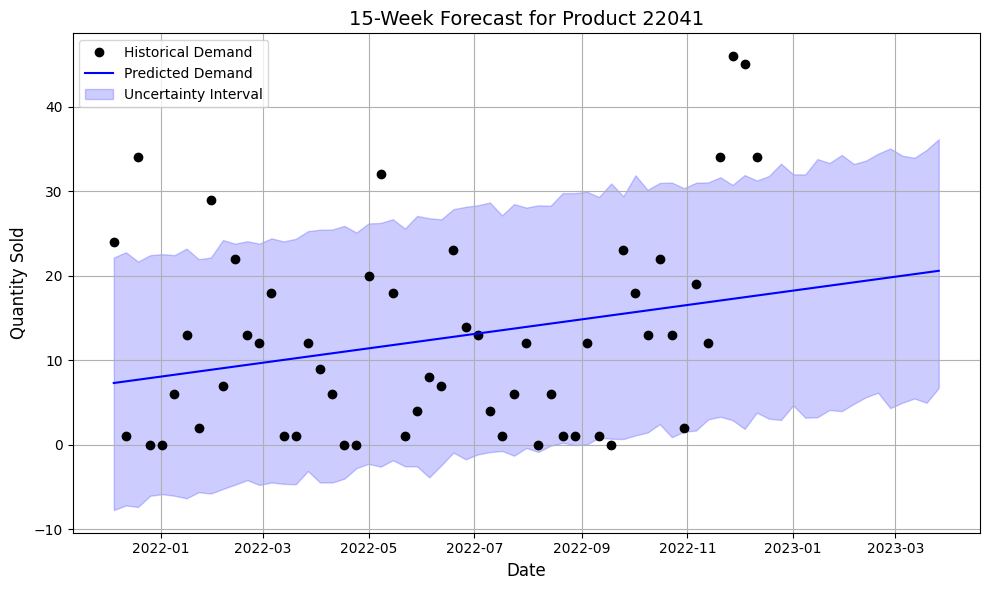

13:29:35 - cmdstanpy - INFO - Chain [1] start processing
13:29:35 - cmdstanpy - INFO - Chain [1] done processing


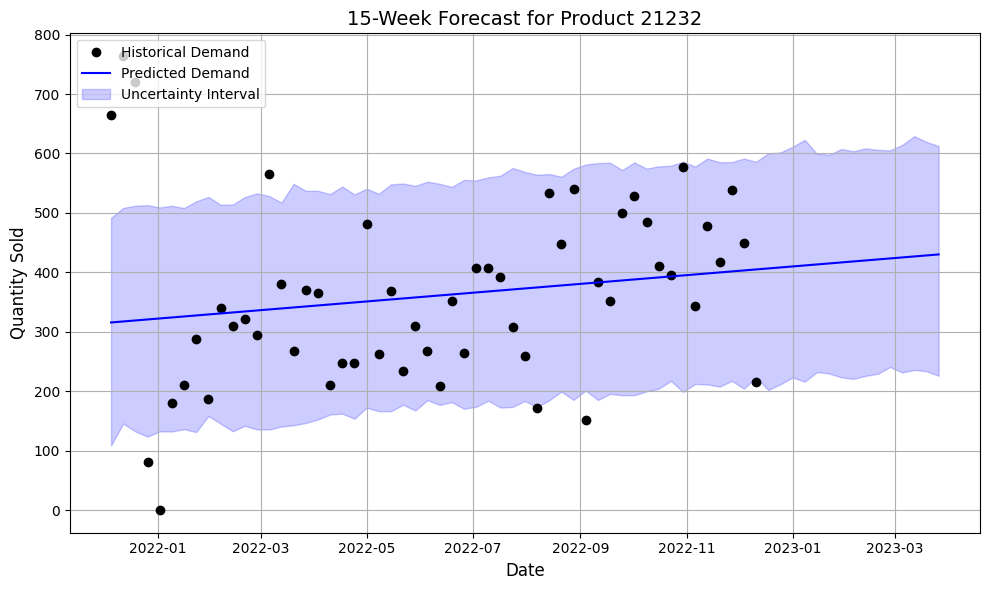

13:29:36 - cmdstanpy - INFO - Chain [1] start processing
13:29:36 - cmdstanpy - INFO - Chain [1] done processing


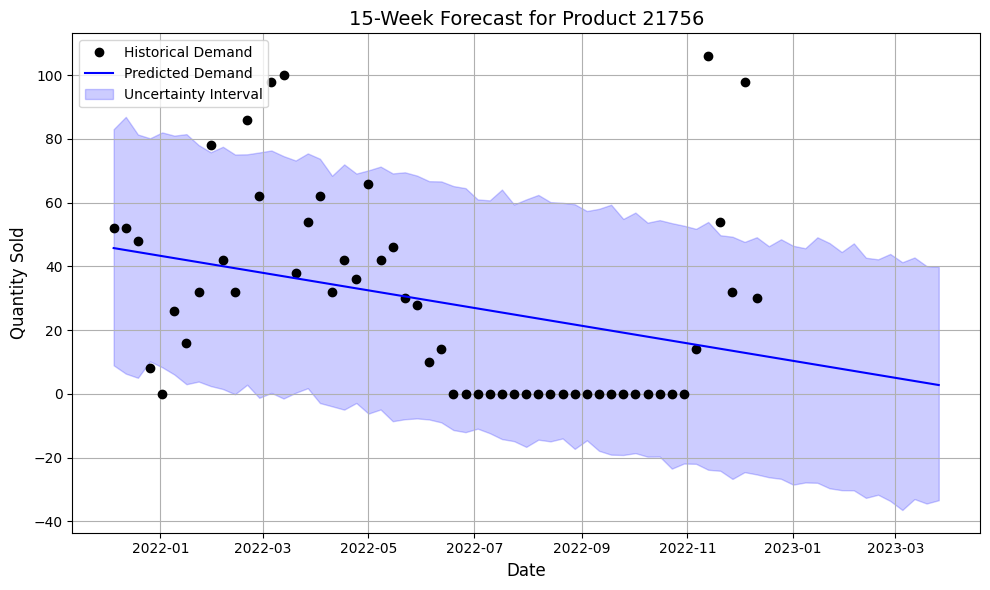

In [19]:
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd

# Assuming top_products contains the top 10 products by sales
top_products = ['85123A', '71053', '84406B', '84029G', '85048', '79323P', '79323W', '22041', '21232', '21756']

# Loop over the top 10 products
for product_code in top_products:
    # Filter data for the selected product (modify this to match your actual data structure)
    product_sales = weekly_sales[weekly_sales['StockCode'] == product_code].copy()
    product_sales = product_sales.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(product_sales)

    # Forecast the next 15 weeks
    future = model.make_future_dataframe(periods=15, freq='W')
    forecast = model.predict(future)

    # Plot the forecast
    plt.figure(figsize=(10, 6))

    # Plot historical demand data
    plt.plot(product_sales['ds'], product_sales['y'], 'ko', label='Historical Demand')

    # Plot forecasted demand
    plt.plot(forecast['ds'], forecast['yhat'], 'b-', label='Predicted Demand')

    # Plot uncertainty intervals
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Interval')

    # Adding title, labels, and grid
    plt.title(f"15-Week Forecast for Product {product_code}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Quantity Sold", fontsize=12)
    plt.grid(True)

    # Enhancing the legend
    plt.legend(loc='upper left')

    # Save each product plot as a separate file (optional)
    plt.savefig(f'forecast_{product_code}.png')

    # Show plot for each product
    plt.tight_layout()
    plt.show()


### Non time series Analysis

85123A - Decision Tree - RMSE: 4.448035948186438, MAE: 3.3167618854788605
85123A - XGBoost - RMSE: 4.448035393117149, MAE: 3.31676152301753


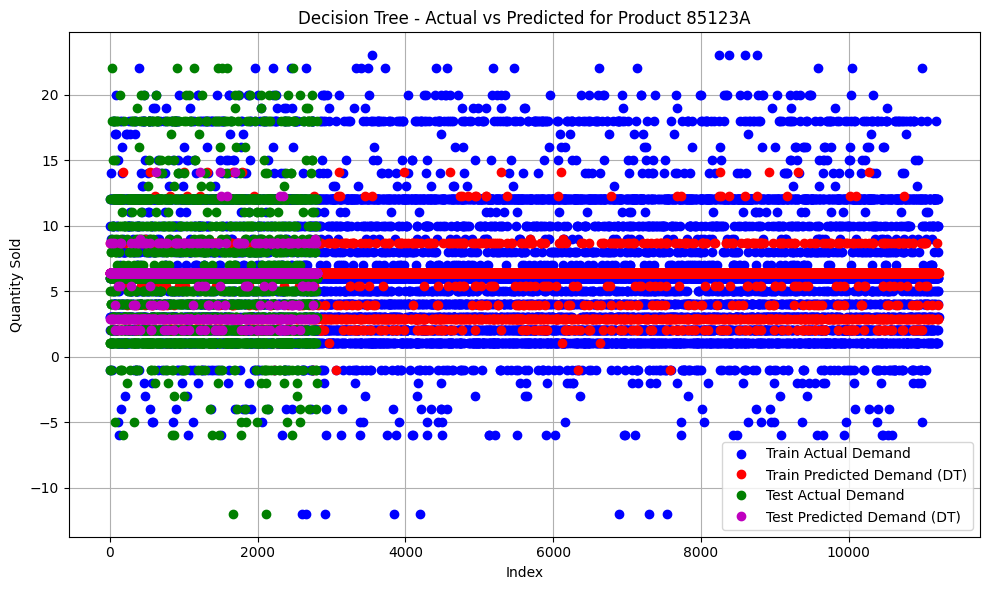

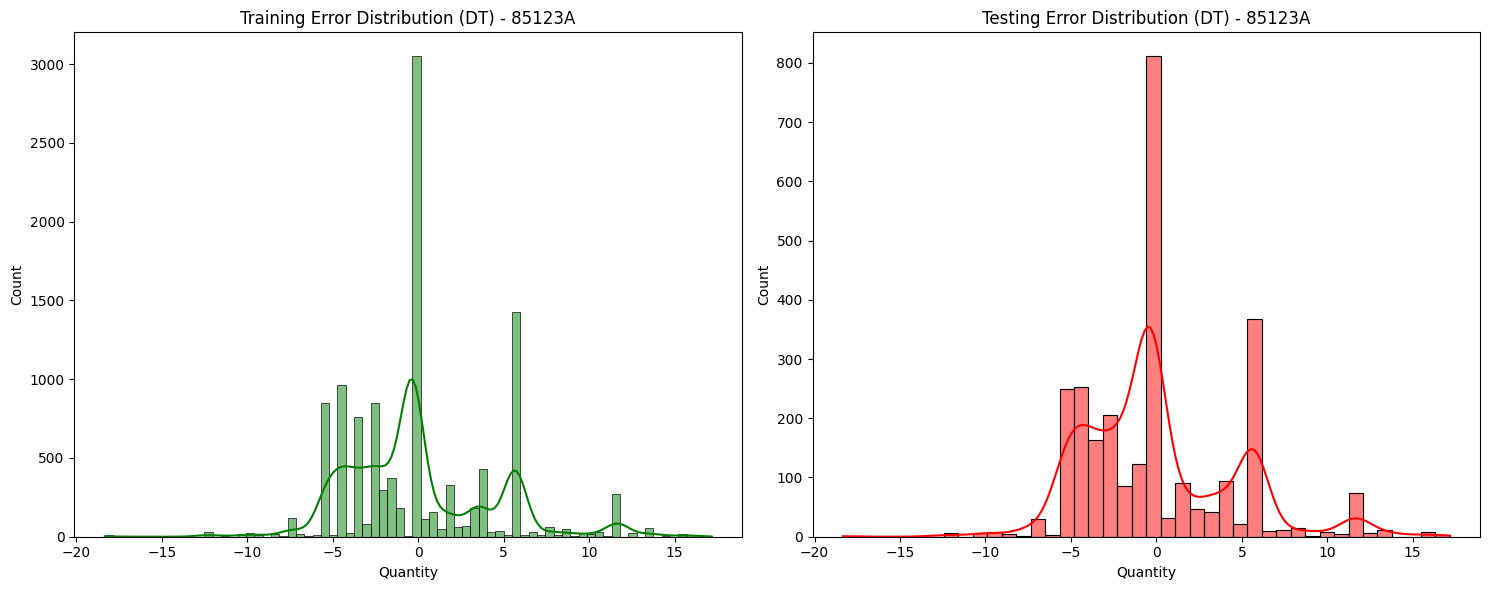

71053 - Decision Tree - RMSE: 2.6981351893427914, MAE: 1.7930577695317667
71053 - XGBoost - RMSE: 2.6981341404283024, MAE: 1.7930500926393451


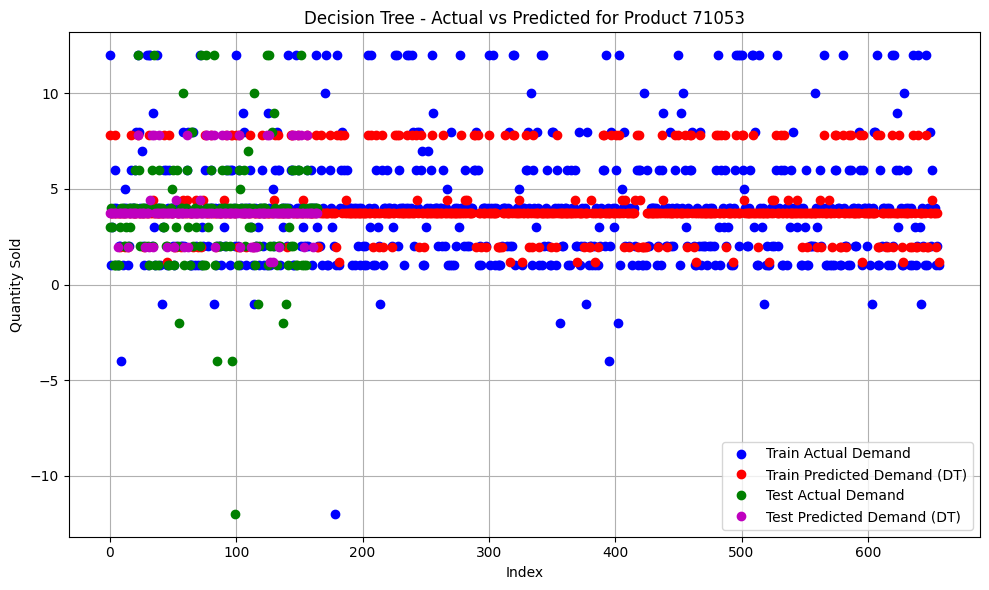

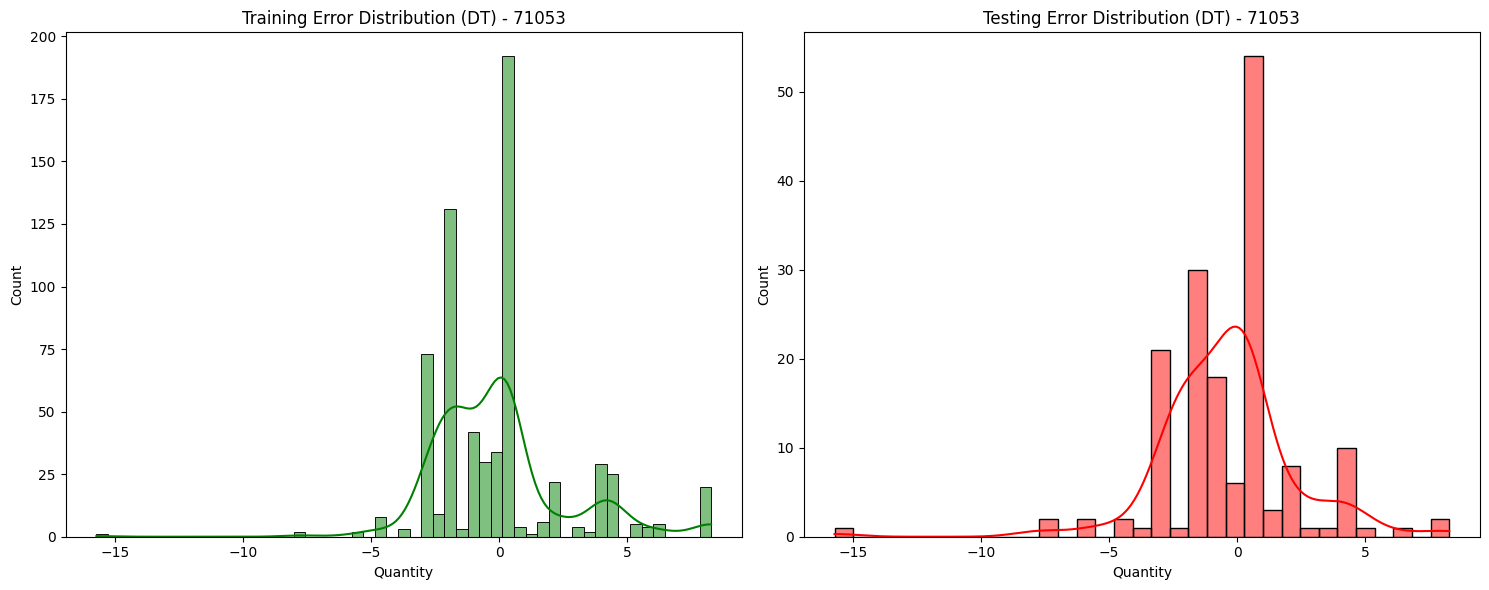

84406B - Decision Tree - RMSE: 3.598533287035065, MAE: 2.9586056519248425
84406B - XGBoost - RMSE: 3.5985331505586178, MAE: 2.958614443962193


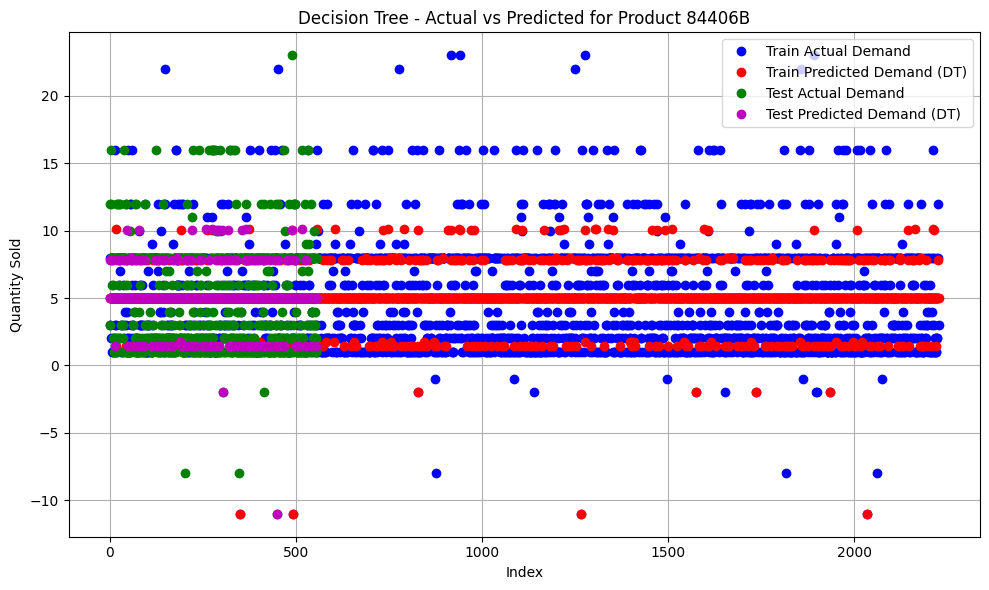

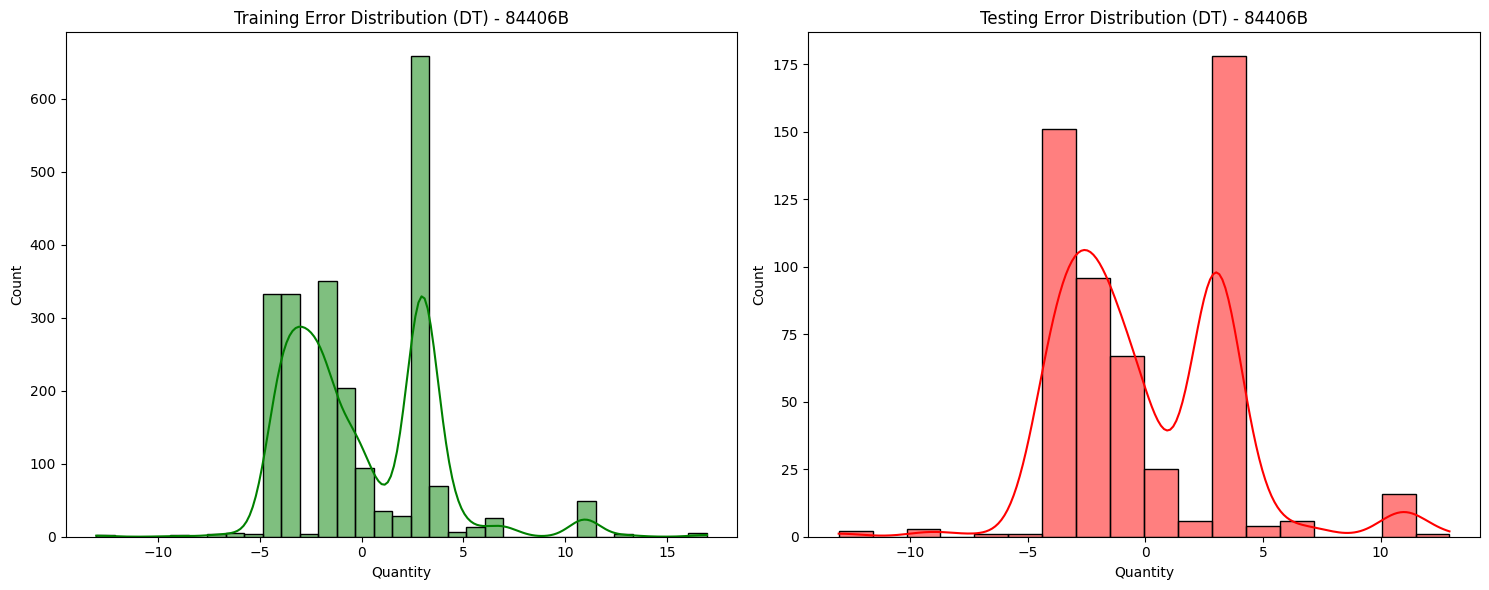

84029G - Decision Tree - RMSE: 2.8247193232222405, MAE: 1.8431314231341227
84029G - XGBoost - RMSE: 2.8247154938749928, MAE: 1.8431311362776264


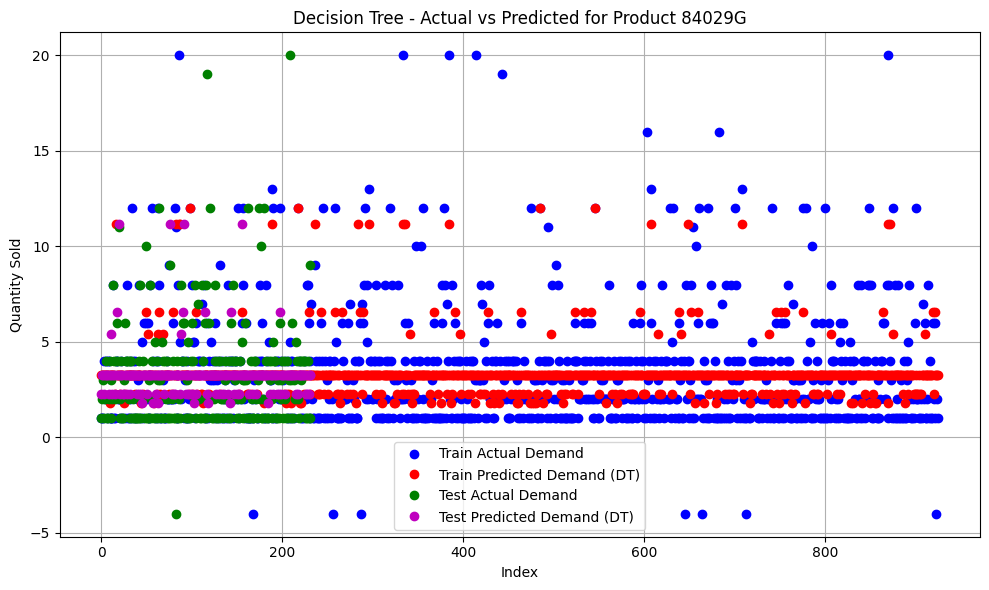

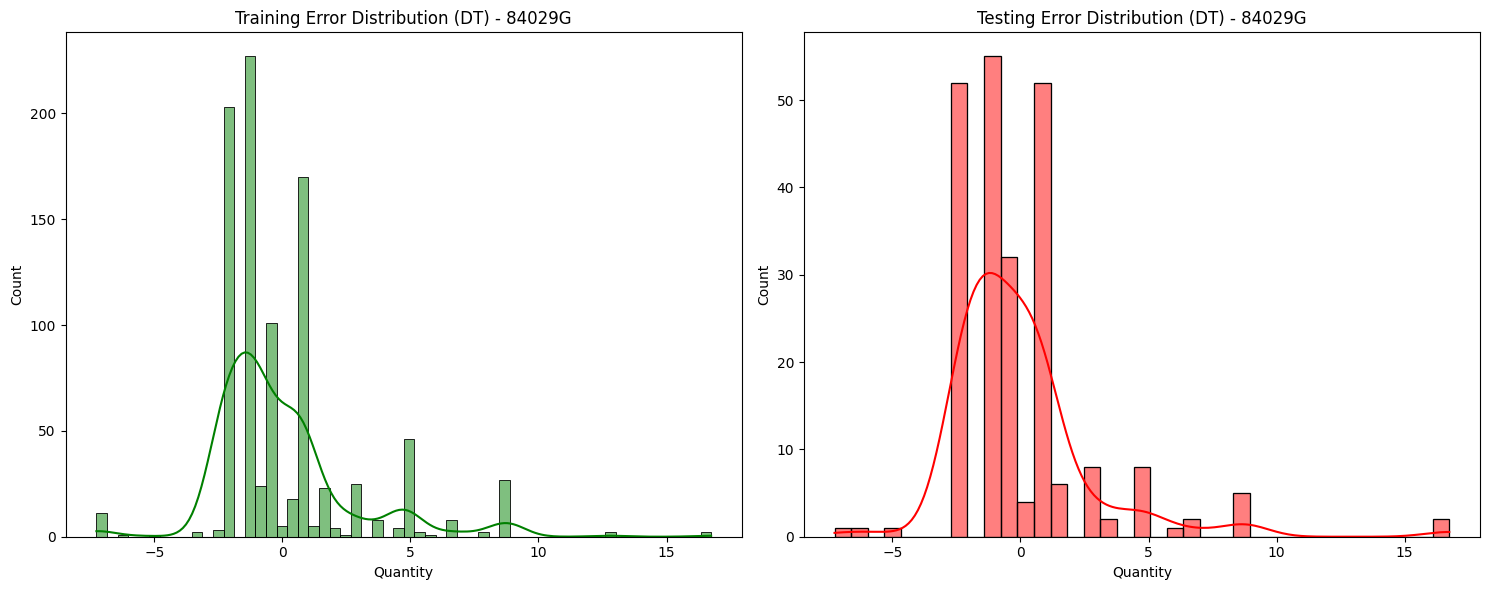

85048 - Decision Tree - RMSE: 3.502630264919178, MAE: 2.2166991552956468
85048 - XGBoost - RMSE: 3.502463838961959, MAE: 2.216717512519271


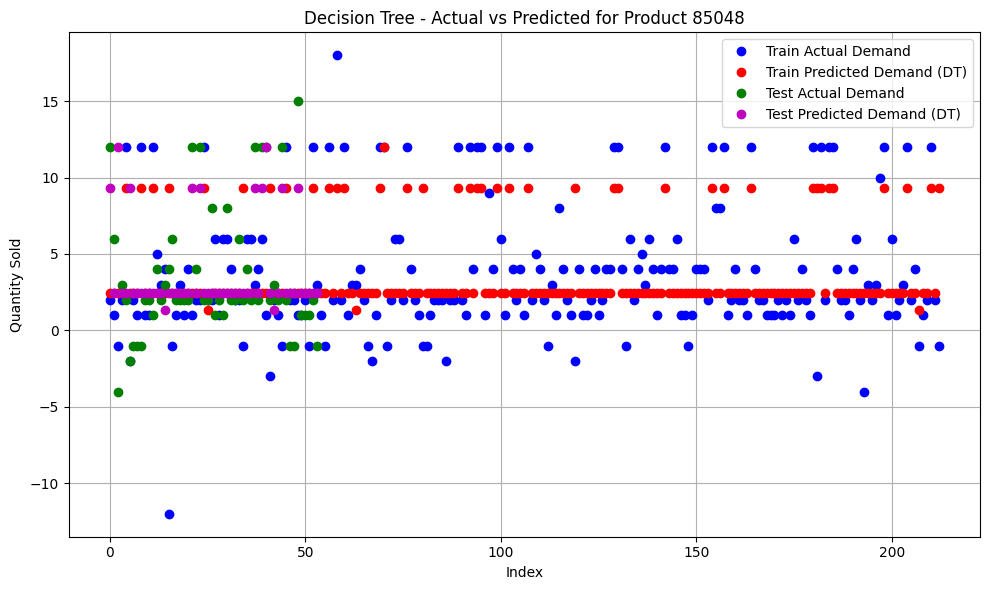

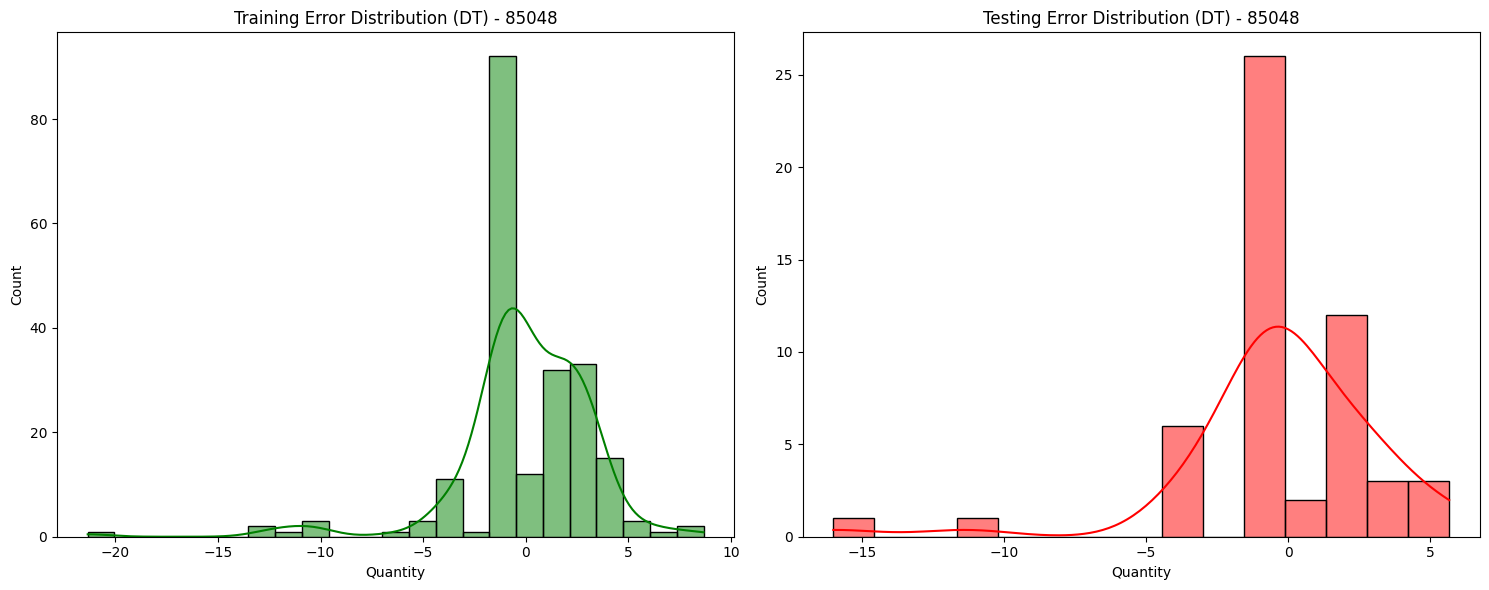

79323P - Decision Tree - RMSE: 4.207710909783672, MAE: 3.2030836349424816
79323P - XGBoost - RMSE: 4.20770874184196, MAE: 3.2030880795075345


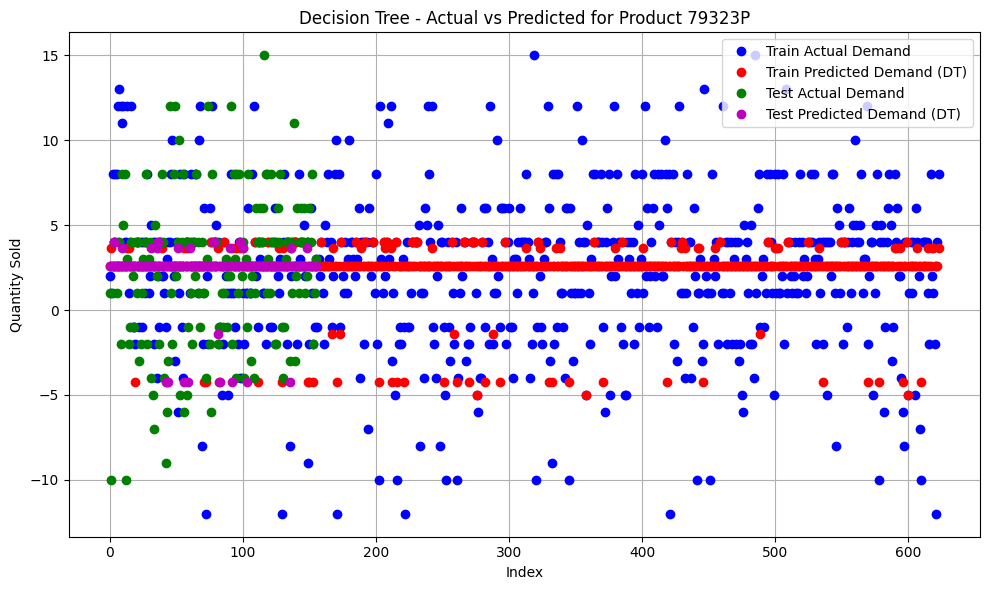

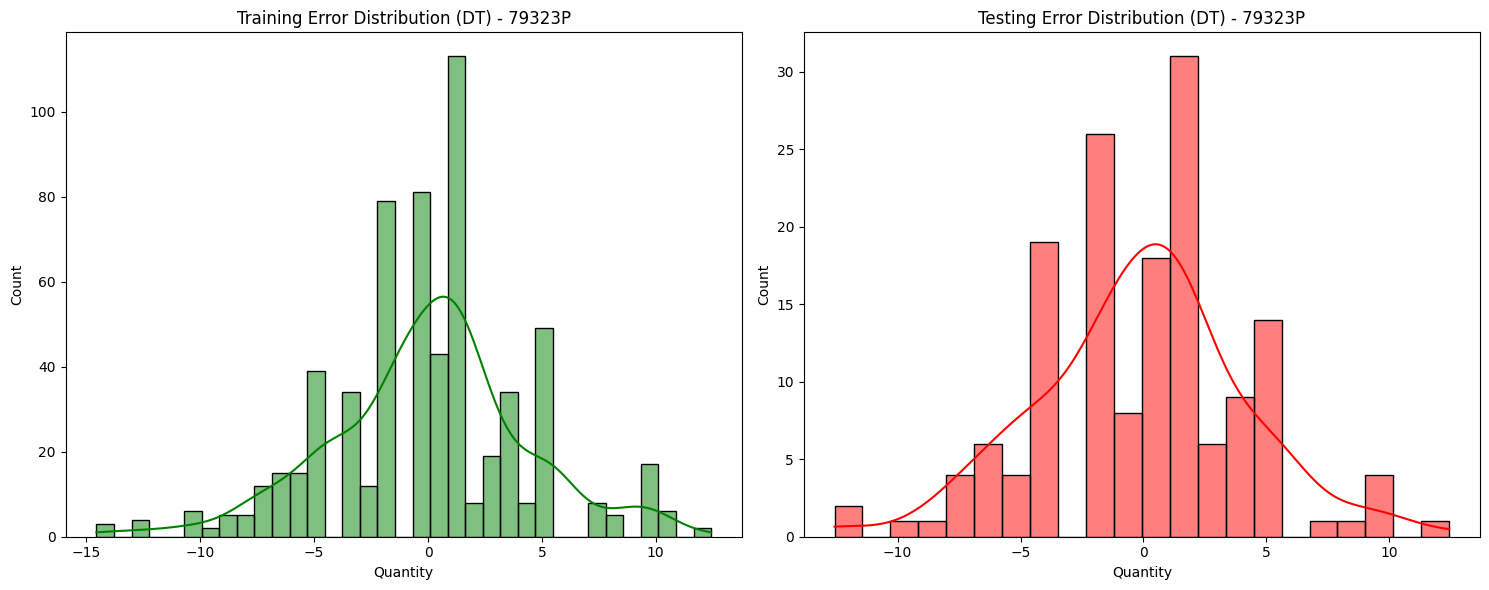

79323W - Decision Tree - RMSE: 4.980458745429951, MAE: 3.48743078912668
79323W - XGBoost - RMSE: 4.980457124572466, MAE: 3.487432393005916


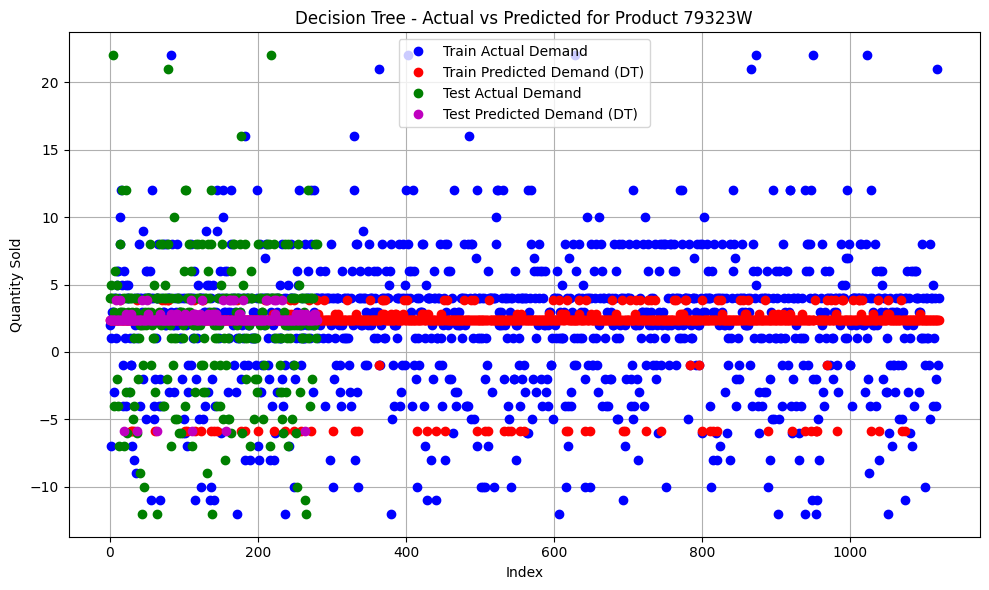

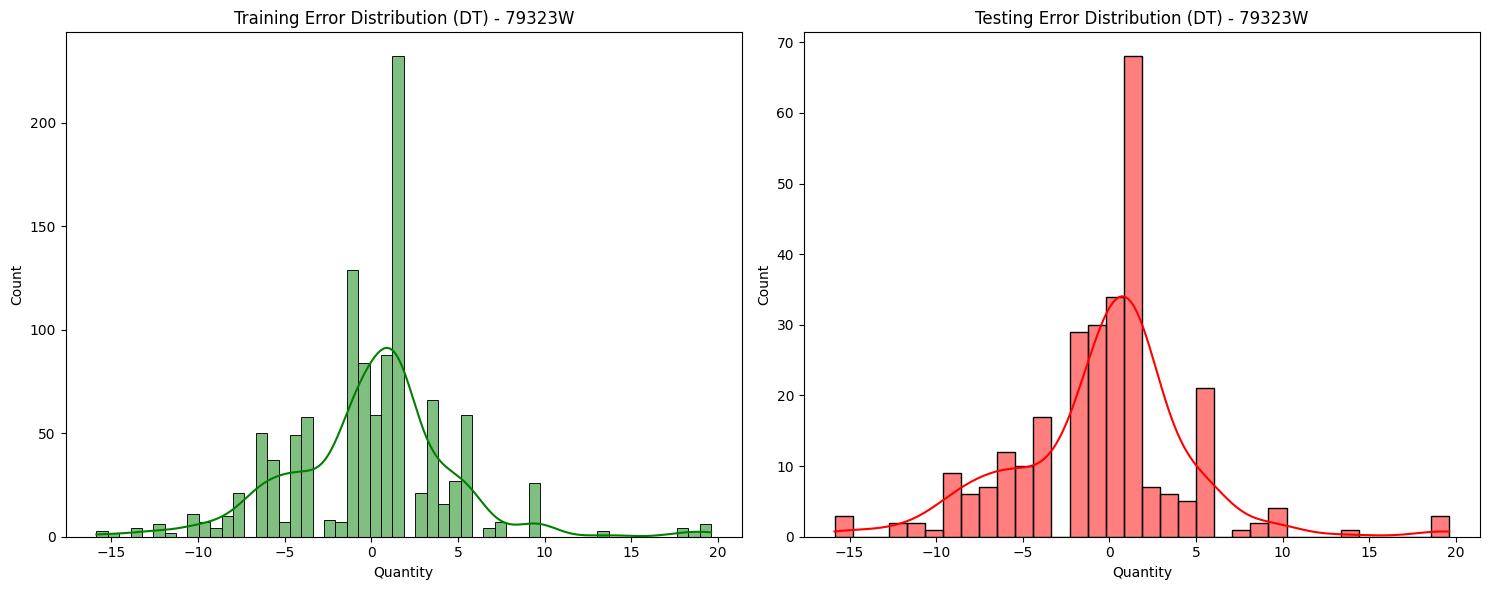

22041 - Decision Tree - RMSE: 2.9153643152813173, MAE: 2.068761205124842
22041 - XGBoost - RMSE: 2.9153452749198667, MAE: 2.068784301931208


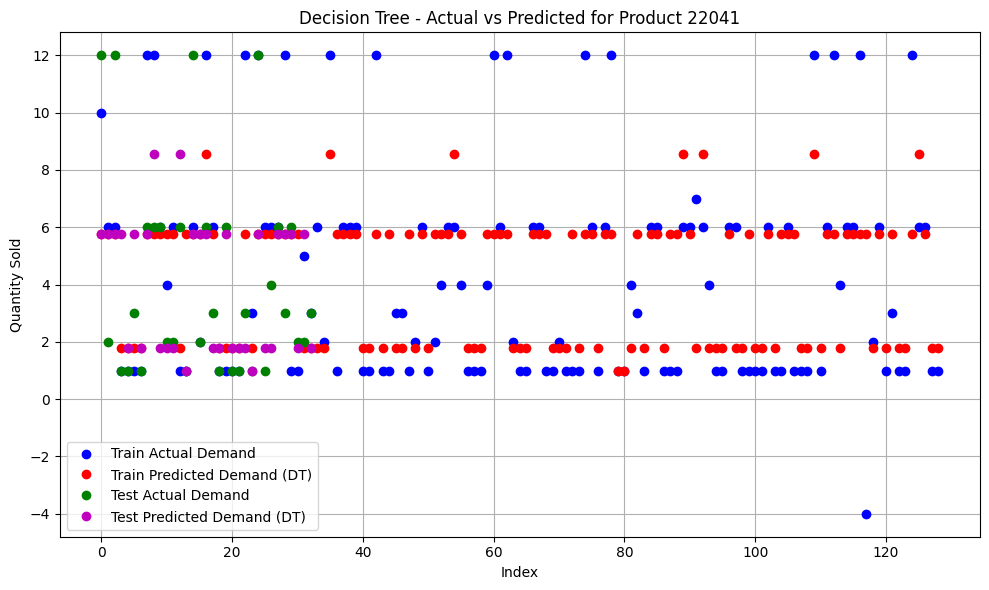

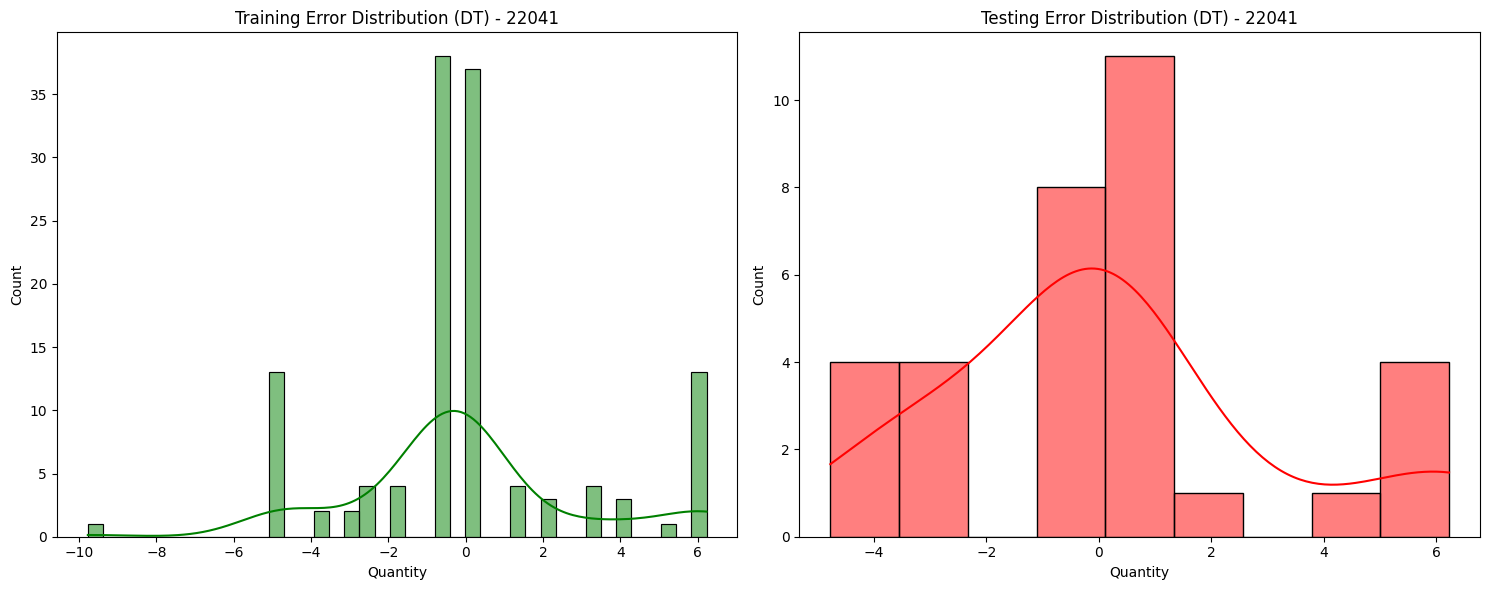

21232 - Decision Tree - RMSE: 5.247857763962428, MAE: 4.504296185981609
21232 - XGBoost - RMSE: 5.2478551342413295, MAE: 4.5042989518689485


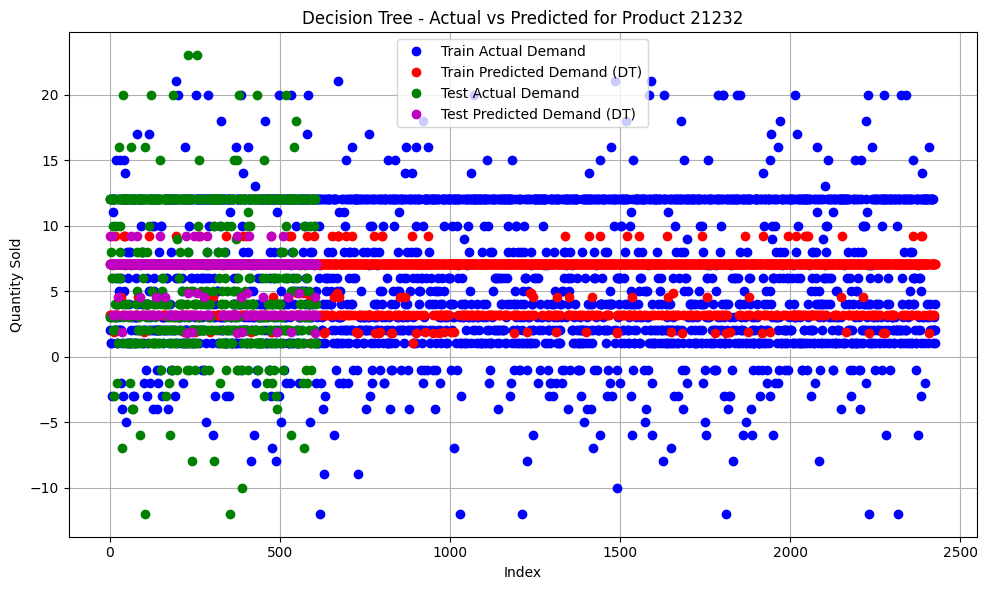

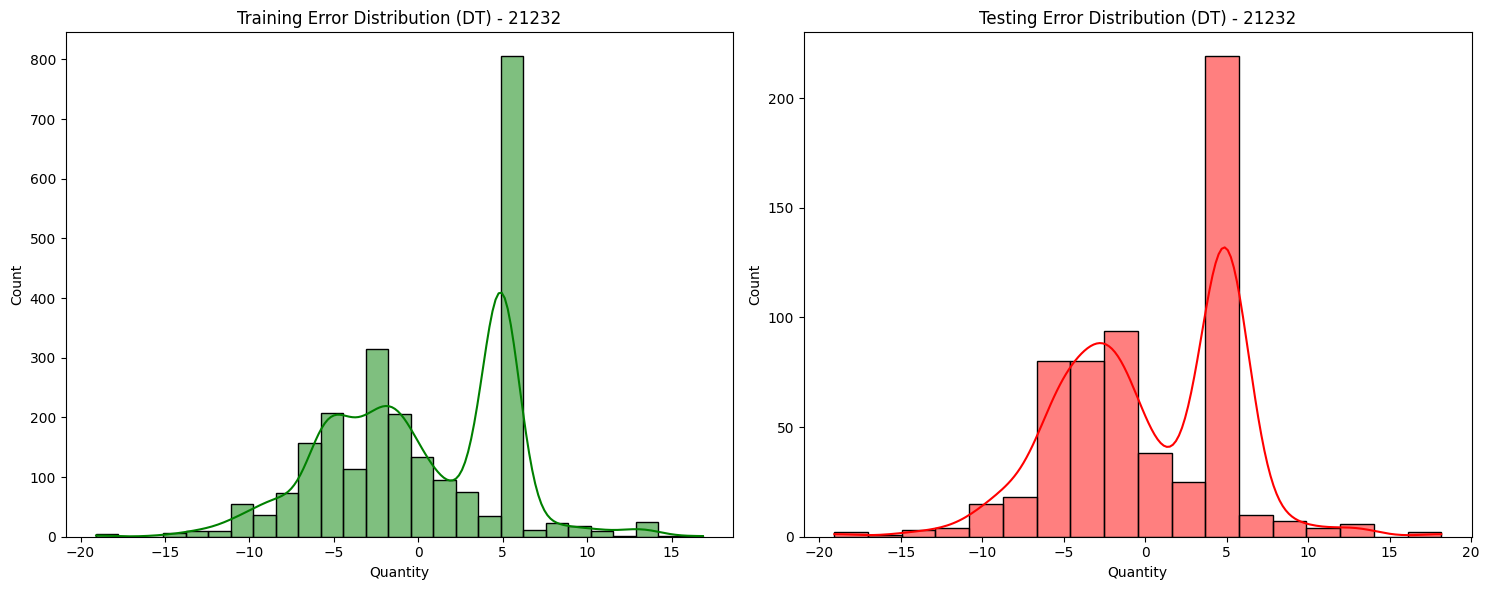

21756 - Decision Tree - RMSE: 2.6151684283258043, MAE: 1.4323914431673053
21756 - XGBoost - RMSE: 2.615124291757906, MAE: 1.4323930223782857


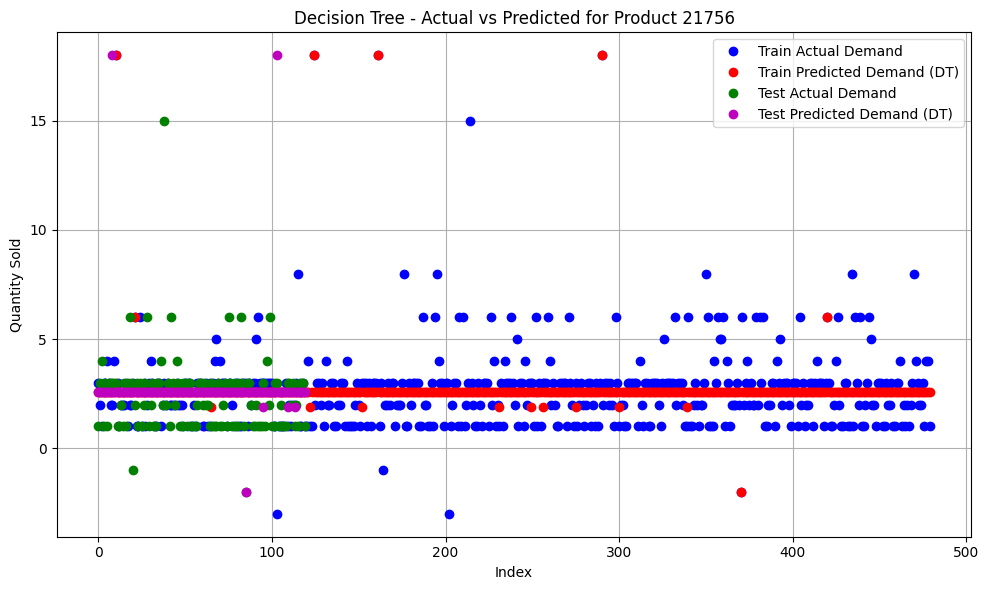

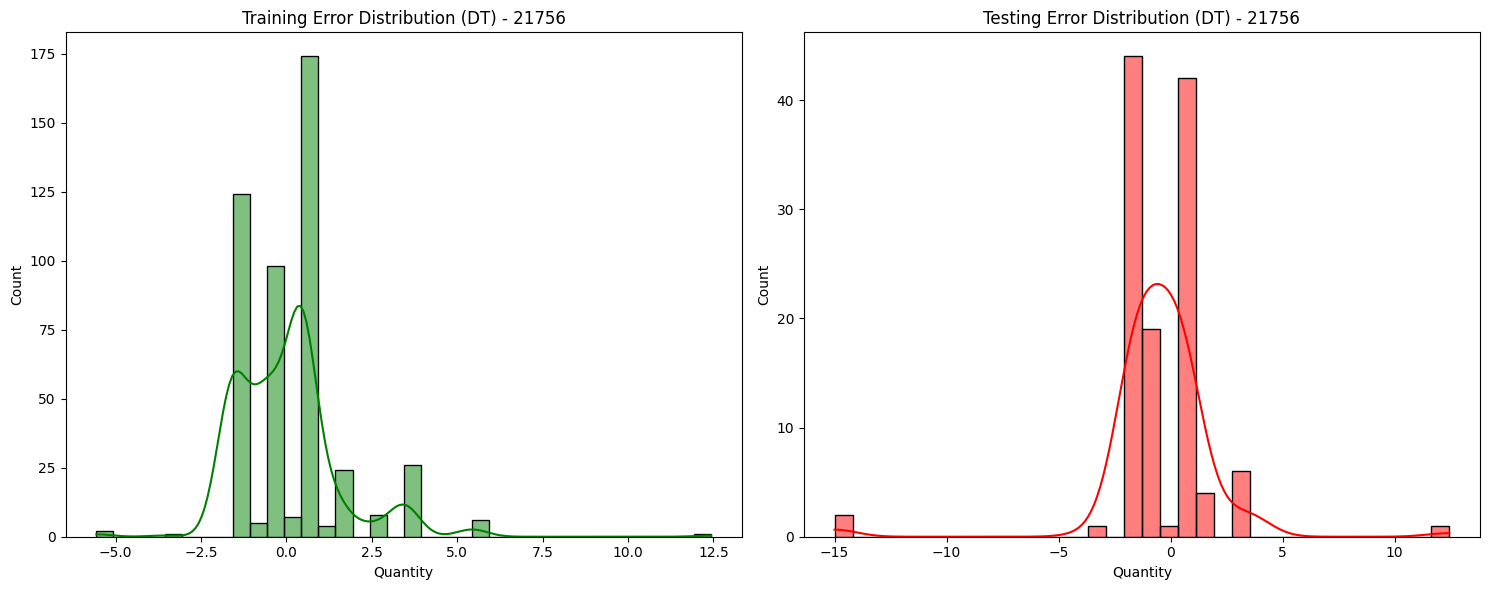

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Assuming top_products contains the top 10 products by sales
top_products = ['85123A', '71053', '84406B', '84029G', '85048', '79323P', '79323W', '22041', '21232', '21756']

# Replace with actual dataset loading logic
# Assuming filtered_df has product information, customer demographics, etc.
# Example: filtered_df = pd.read_csv('your_data.csv')

# Apply one-hot encoding to categorical variables like StockCode and Country (if available)
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Filter for non-time features (e.g., StockCode, Price, Country)
for product_code in top_products:
    product_sales = filtered_df[filtered_df['StockCode'] == product_code]

    # Feature engineering (replace with actual feature columns like price, customer demographics)
    features = ['Price', 'Country']  # Add relevant features
    target = 'Quantity'

    # Apply one-hot encoding
    X_encoded = onehot_encoder.fit_transform(product_sales[['Country']])  # Example for Country
    X_encoded_df = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(['Country']))

    # Combine with numerical features (e.g., Price)
    X_numerical = product_sales[['Price']]  # Add other numerical features if needed
    X = pd.concat([X_numerical.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

    # Target variable
    y = product_sales[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

    # Initialize and fit the models (Decision Tree and XGBoost)
    dt_model = DecisionTreeRegressor()
    xgb_model = xgb.XGBRegressor()  # Updated to xgb.XGBRegressor()

    # Train both models
    dt_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)

    # Predict using Decision Tree and XGBoost
    y_pred_train_dt = dt_model.predict(X_train)
    y_pred_test_dt = dt_model.predict(X_test)
    y_pred_train_xgb = xgb_model.predict(X_train)
    y_pred_test_xgb = xgb_model.predict(X_test)

    # Calculate error metrics (for evaluation)
    rmse_dt = mean_squared_error(y_test, y_pred_test_dt, squared=False)
    mae_dt = mean_absolute_error(y_test, y_pred_test_dt)

    rmse_xgb = mean_squared_error(y_test, y_pred_test_xgb, squared=False)
    mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

    print(f"{product_code} - Decision Tree - RMSE: {rmse_dt}, MAE: {mae_dt}")
    print(f"{product_code} - XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}")

    # Plot the actual vs predicted demand for Decision Tree
    plt.figure(figsize=(10, 6))

    plt.plot(range(len(y_train)), y_train, 'bo', label='Train Actual Demand')
    plt.plot(range(len(y_train)), y_pred_train_dt, 'ro', label='Train Predicted Demand (DT)')

    plt.plot(range(len(y_test)), y_test, 'go', label='Test Actual Demand')
    plt.plot(range(len(y_test)), y_pred_test_dt, 'mo', label='Test Predicted Demand (DT)')

    plt.title(f"Decision Tree - Actual vs Predicted for Product {product_code}")
    plt.xlabel("Index")
    plt.ylabel("Quantity Sold")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot error distribution
    plt.figure(figsize=(15, 6))

    # Training error distribution (Decision Tree)
    plt.subplot(1, 2, 1)
    train_errors_dt = y_train - y_pred_train_dt
    sns.histplot(train_errors_dt, kde=True, color='green')
    plt.title(f'Training Error Distribution (DT) - {product_code}')

    # Testing error distribution (Decision Tree)
    plt.subplot(1, 2, 2)
    test_errors_dt = y_test - y_pred_test_dt
    sns.histplot(test_errors_dt, kde=True, color='red')
    plt.title(f'Testing Error Distribution (DT) - {product_code}')

    plt.tight_layout()
    plt.show()


###Using GridSearchCV for Hyperparameter Tuning for XGBoost Model:

Processing product: 85123A
85123A - RMSE (Train): 72.92679241683332, RMSE (Test): 64.56705654183773
85123A - MAE (Train): 11.801433720386466, MAE (Test): 13.83529731022964


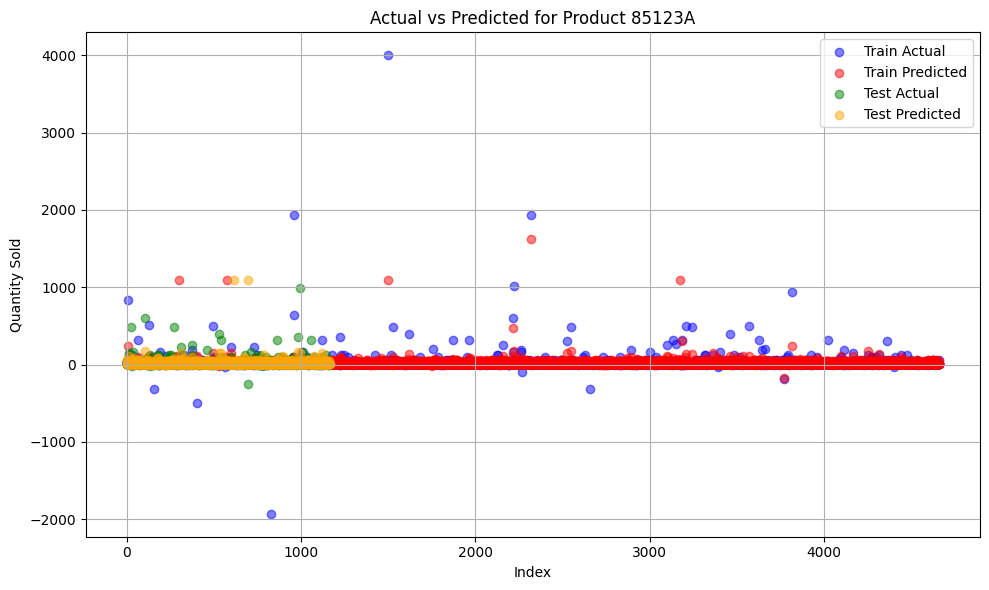

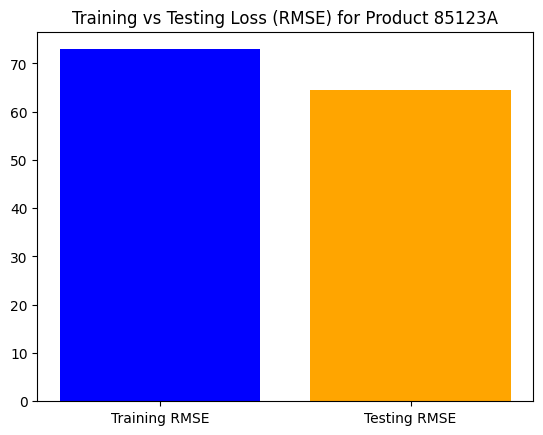

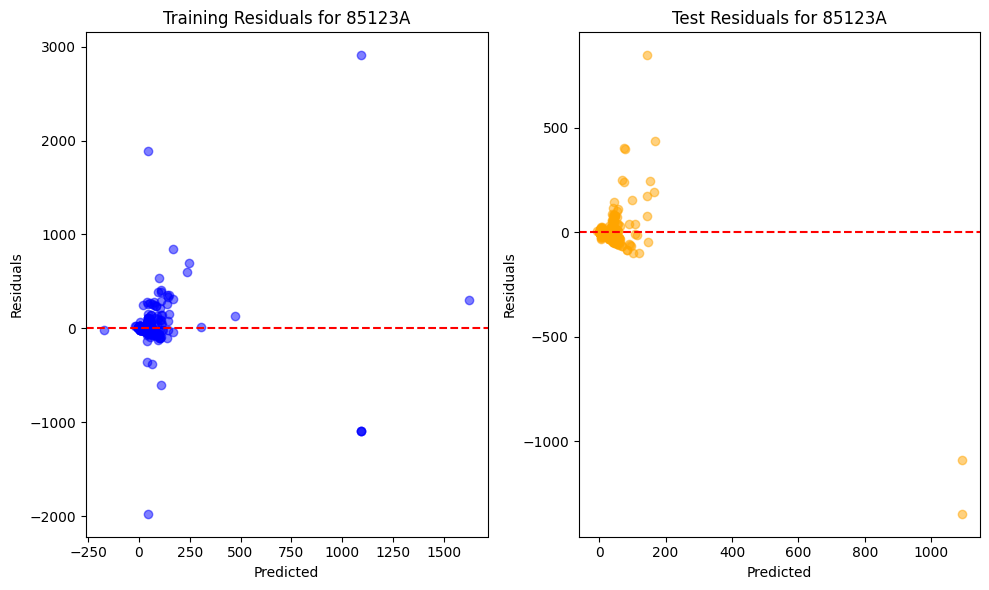

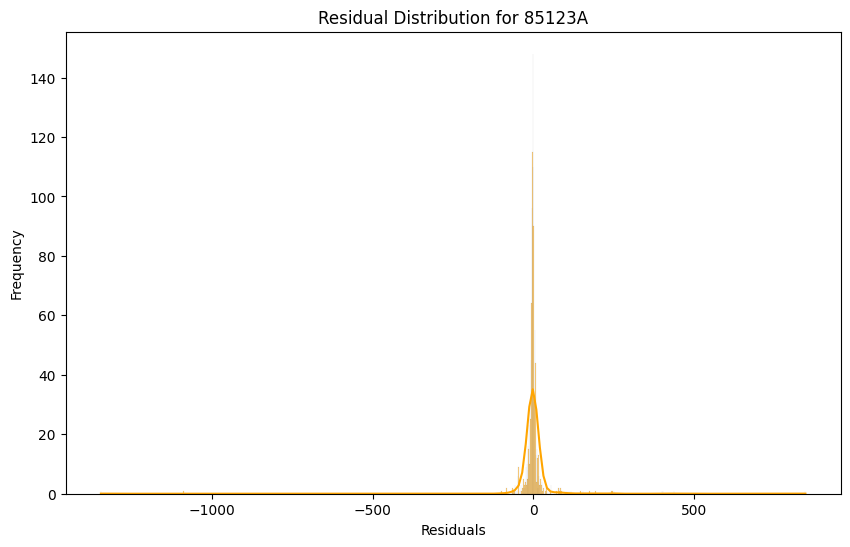

Processing product: 71053
71053 - RMSE (Train): 5.518682380874377, RMSE (Test): 3.933476640308643
71053 - MAE (Train): 2.697752975919298, MAE (Test): 2.506365528813115


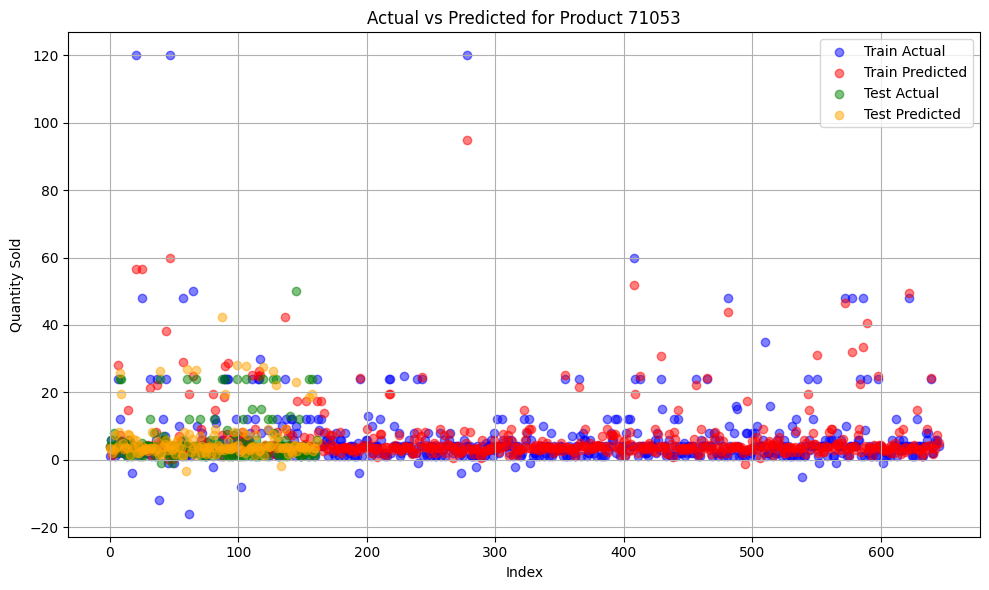

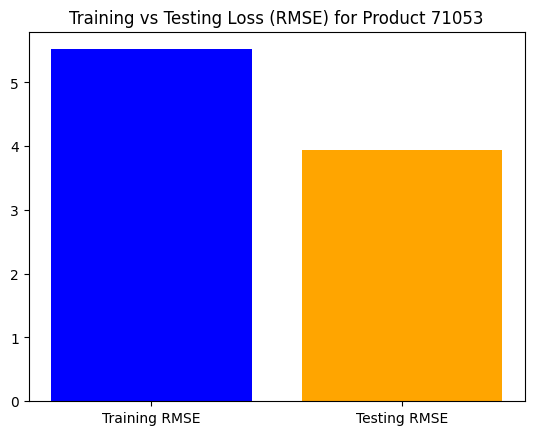

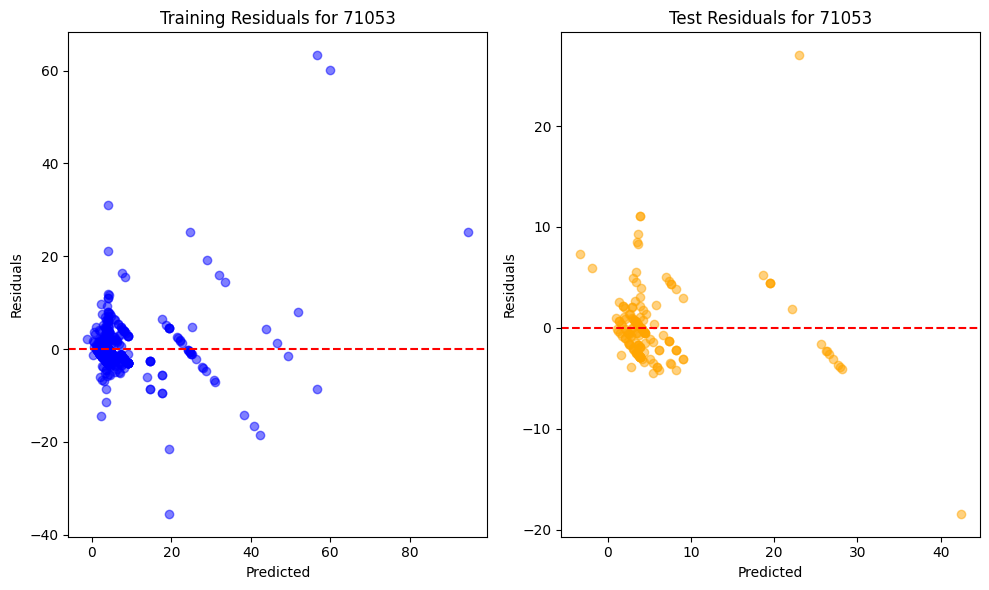

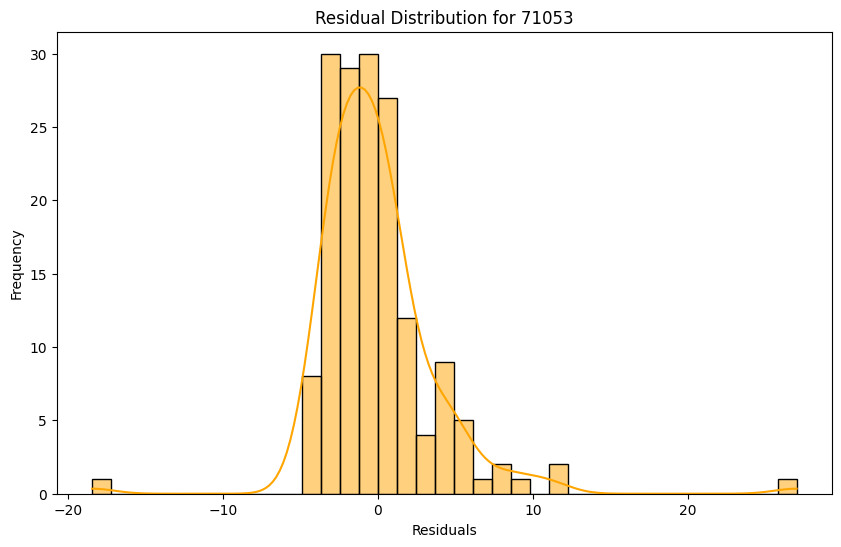

Processing product: 84406B
84406B - RMSE (Train): 14.8869496769664, RMSE (Test): 9.524602888987612
84406B - MAE (Train): 4.72256784402813, MAE (Test): 4.93517321644567


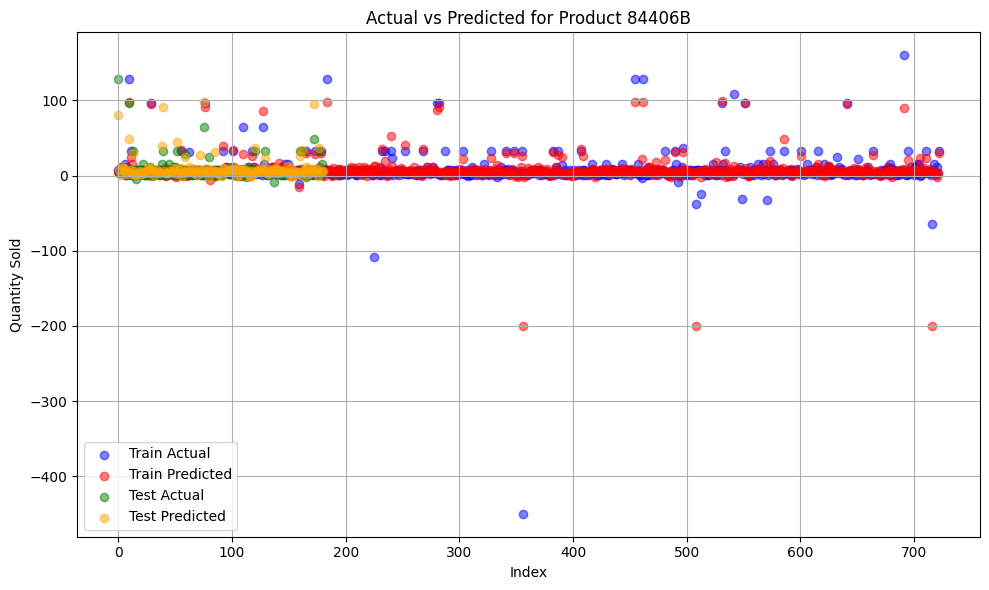

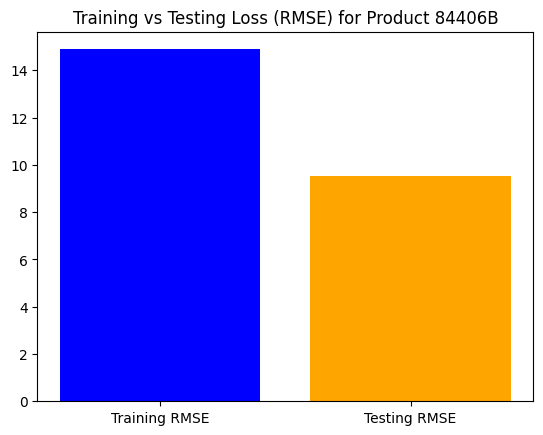

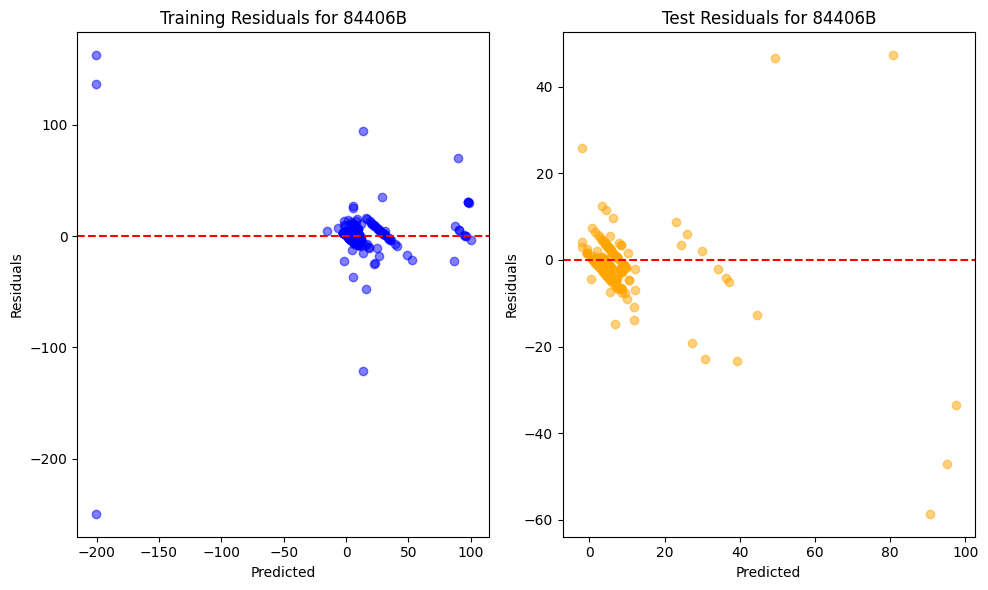

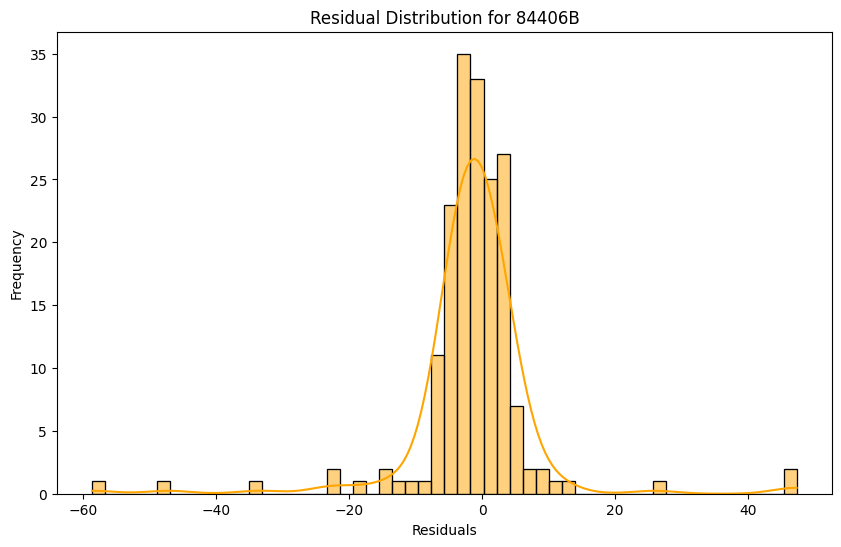

Processing product: 84029G
84029G - RMSE (Train): 5.0246755635841, RMSE (Test): 23.69494135800885
84029G - MAE (Train): 2.7729860728853137, MAE (Test): 6.348224318027496


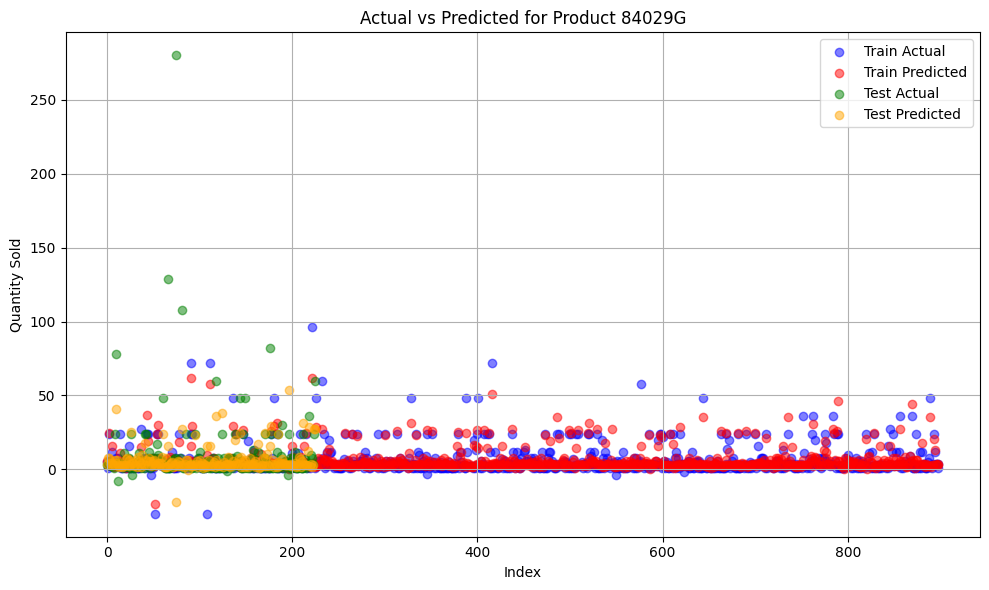

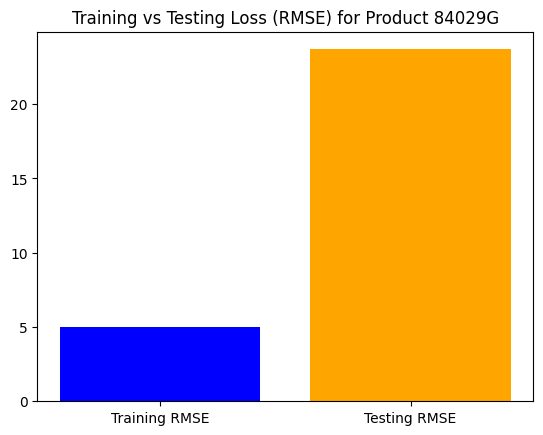

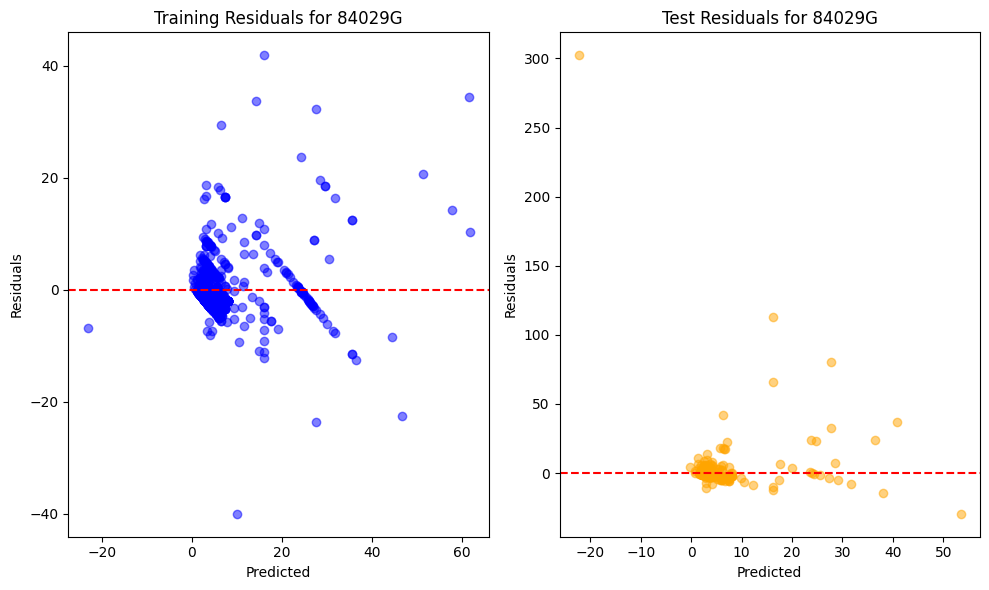

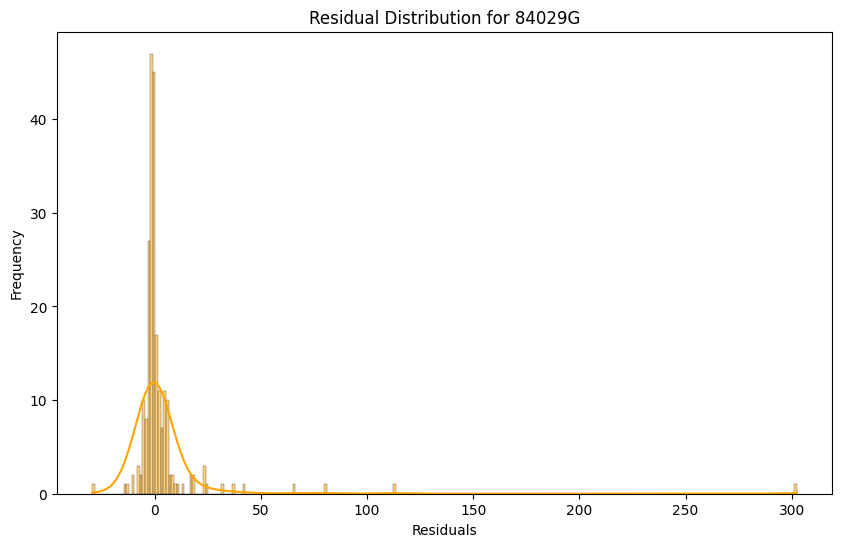

Processing product: 85048
85048 - RMSE (Train): 3.535759529187152, RMSE (Test): 4.233376496154773
85048 - MAE (Train): 2.102188741445048, MAE (Test): 2.481712663961836


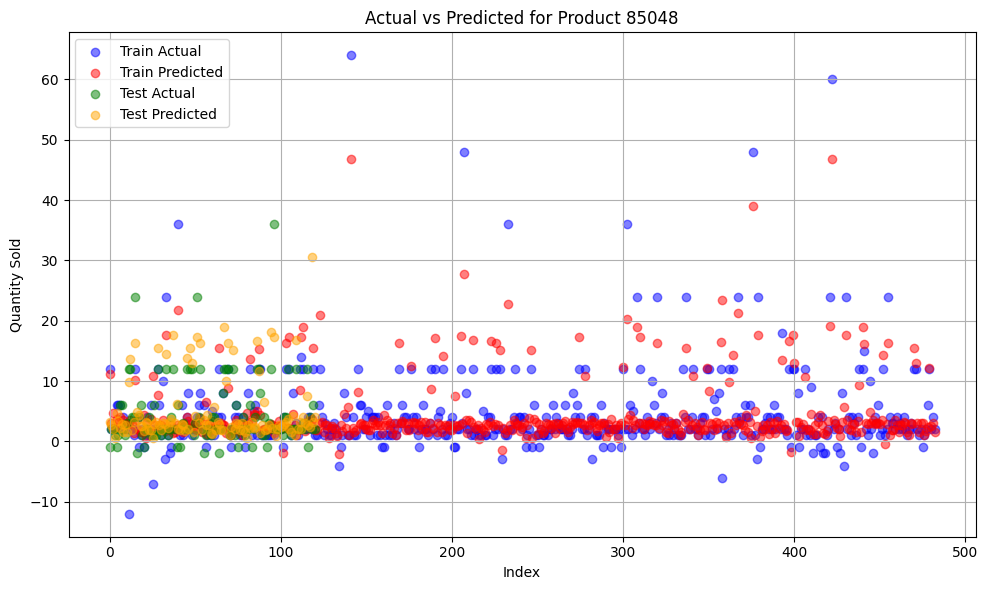

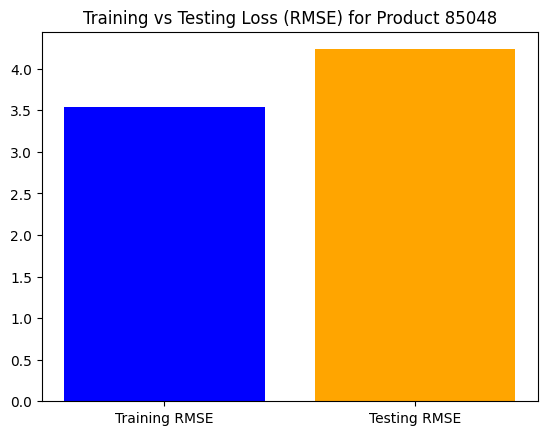

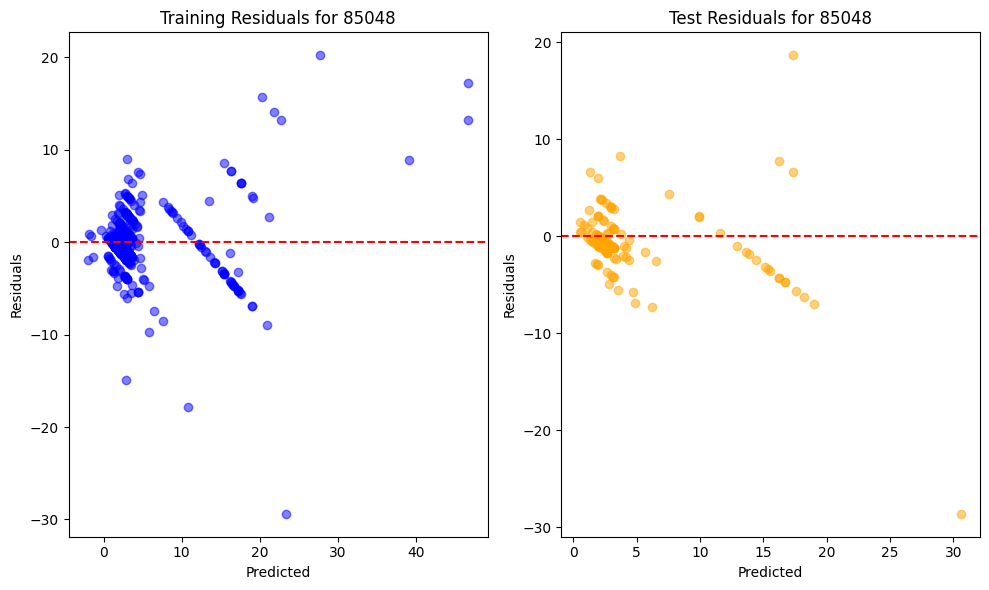

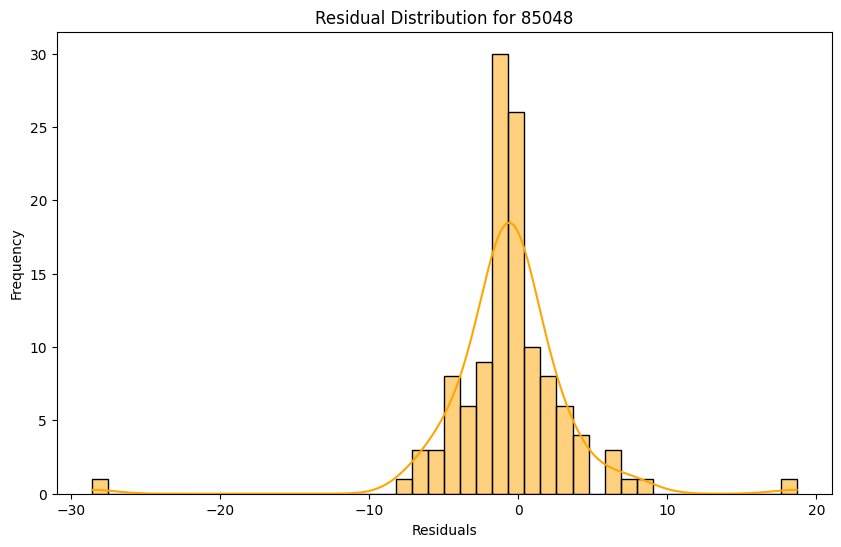

Processing product: 79323P
79323P - RMSE (Train): 8.334853352104018, RMSE (Test): 155.43533782933608
79323P - MAE (Train): 4.570845459828107, MAE (Test): 23.078517085229848


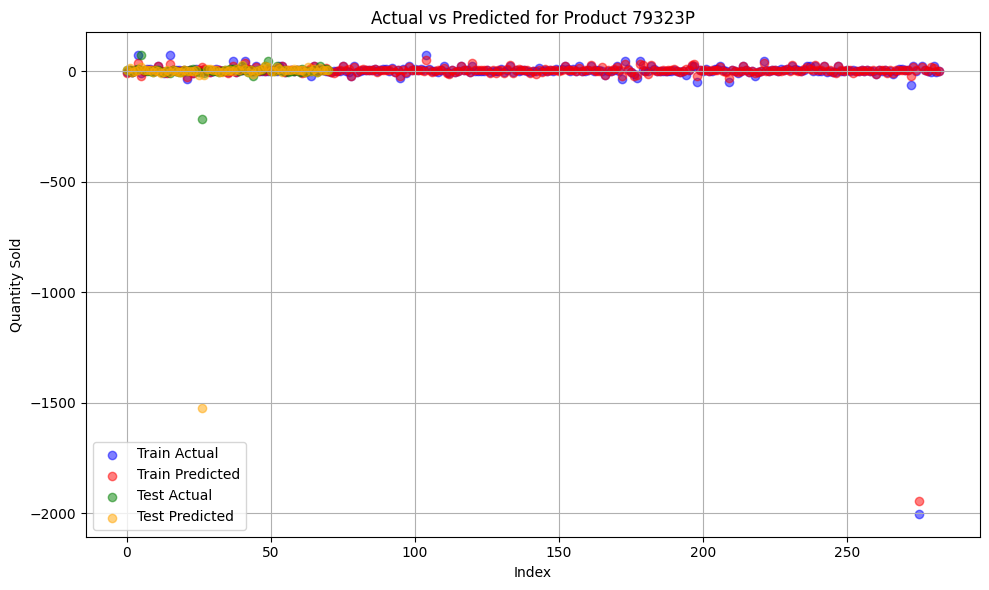

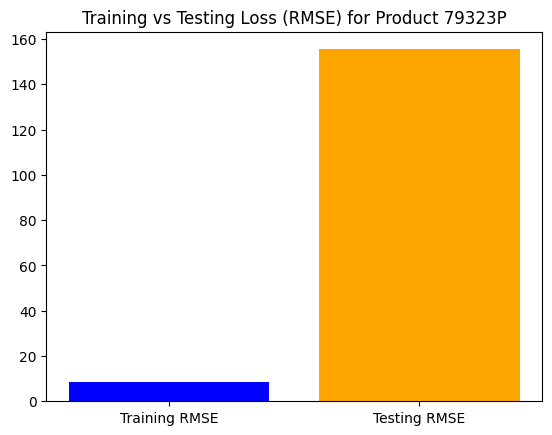

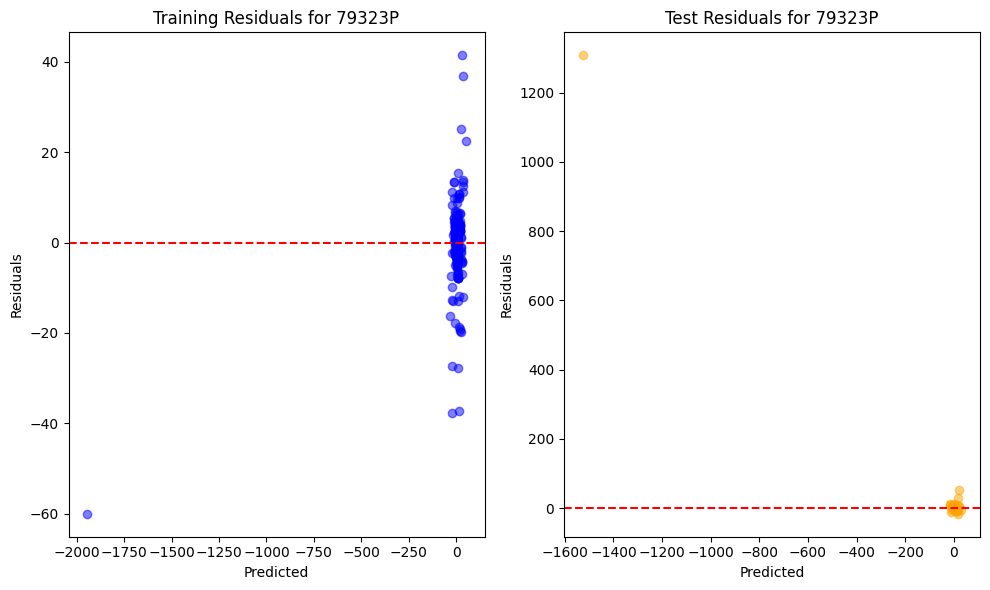

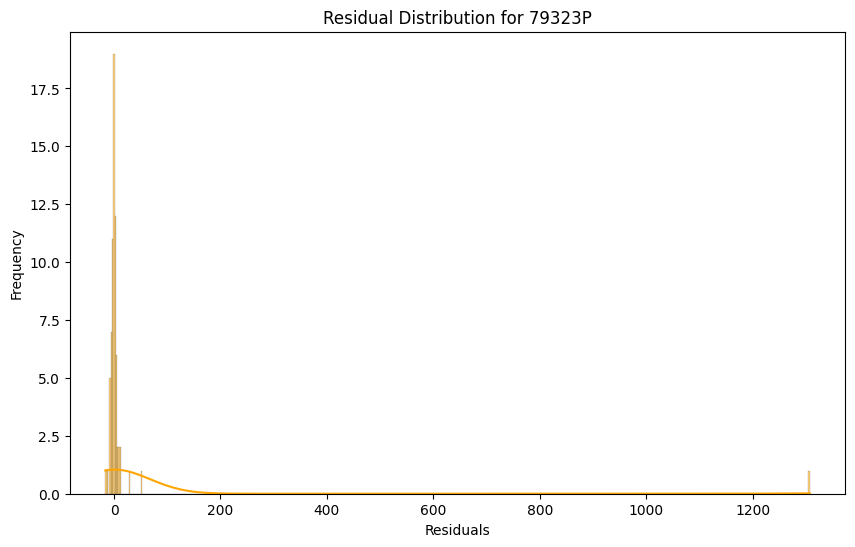

Processing product: 79323W
79323W - RMSE (Train): 20.614648173224573, RMSE (Test): 89.92020794633156
79323W - MAE (Train): 6.550004458864322, MAE (Test): 16.19816072843969


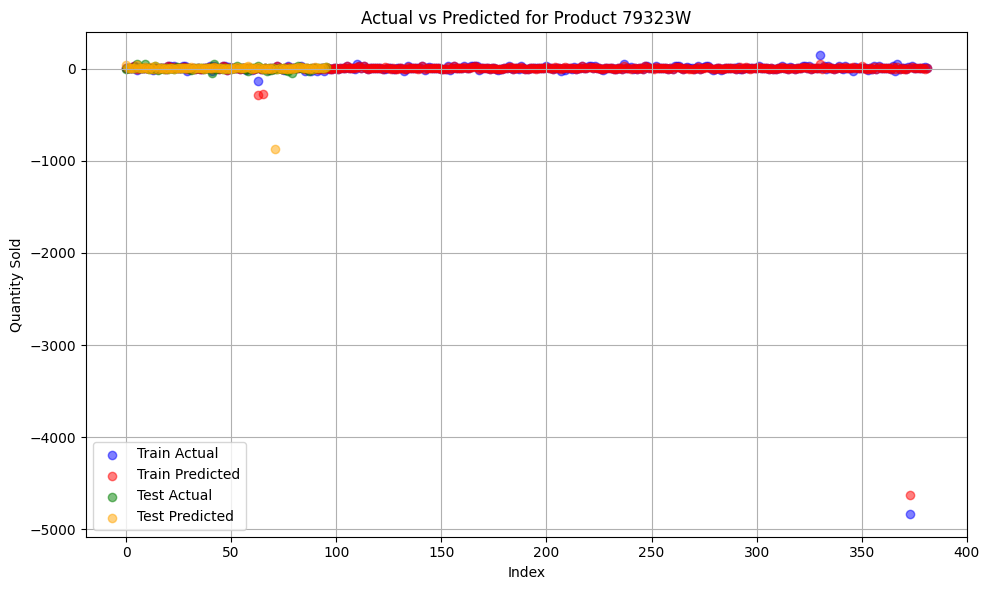

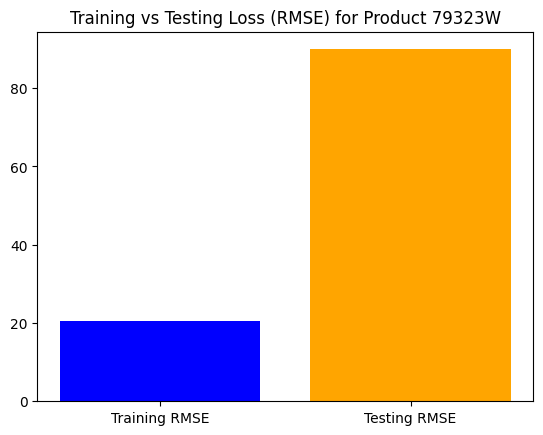

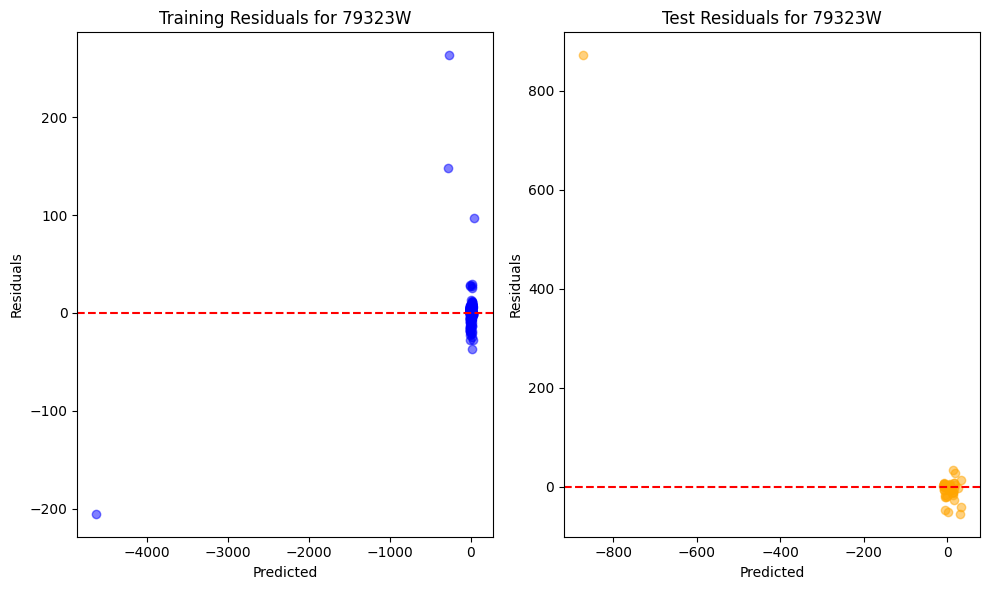

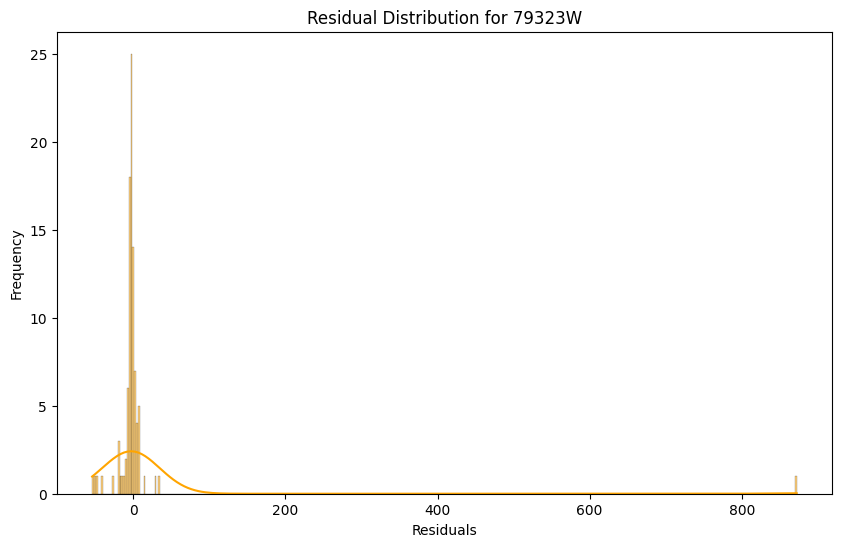

Processing product: 22041
22041 - RMSE (Train): 9.838044675732691, RMSE (Test): 20.354865298274042
22041 - MAE (Train): 4.24872566280506, MAE (Test): 8.374840502046112


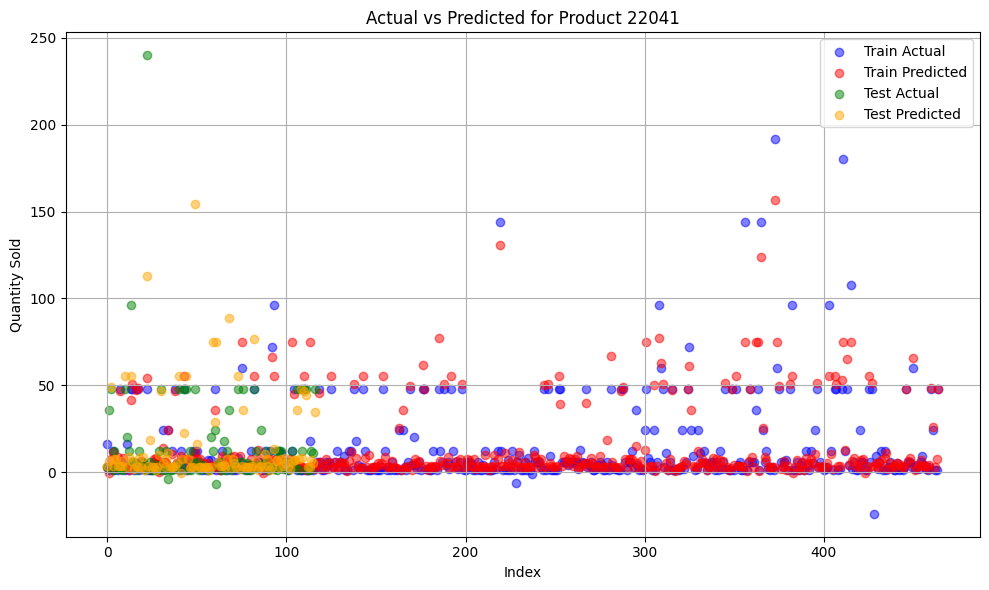

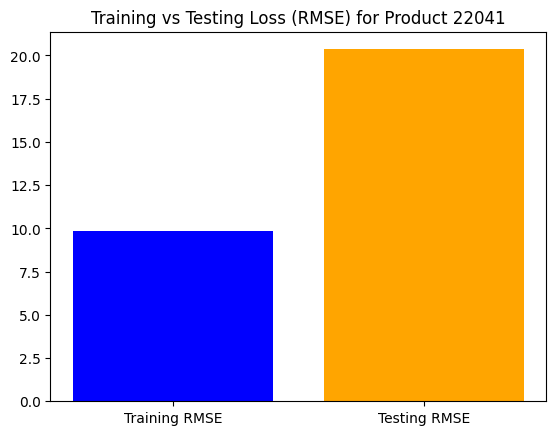

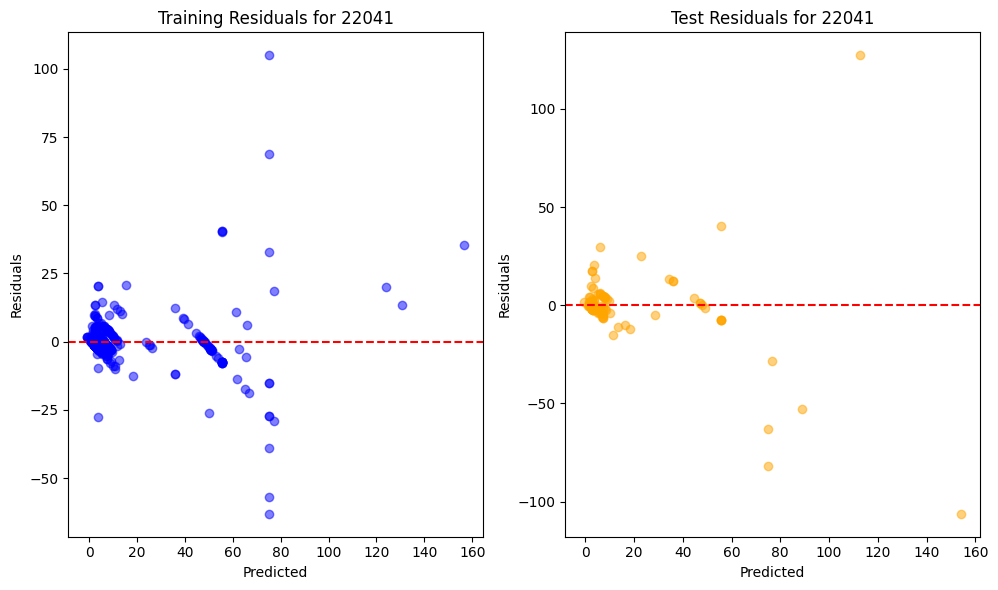

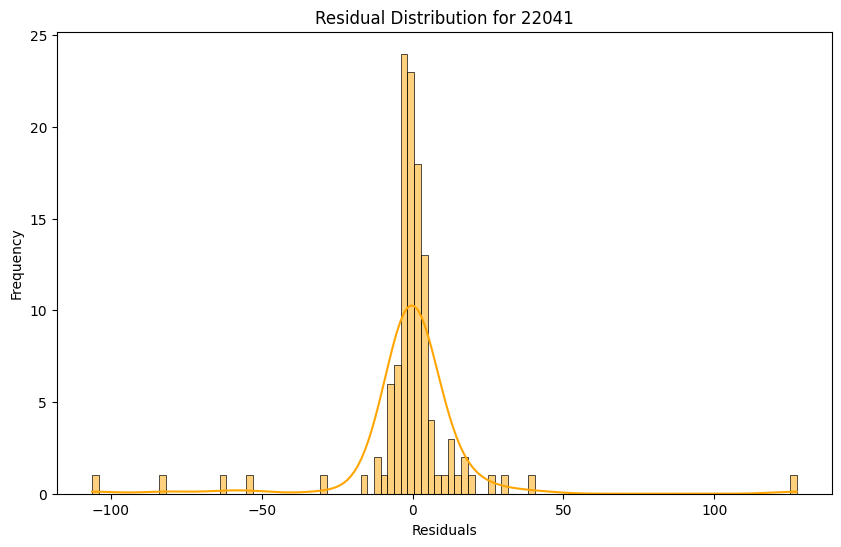

Processing product: 21232
21232 - RMSE (Train): 17.74159383021016, RMSE (Test): 20.954921669284655
21232 - MAE (Train): 8.181629333731582, MAE (Test): 9.846633810130033


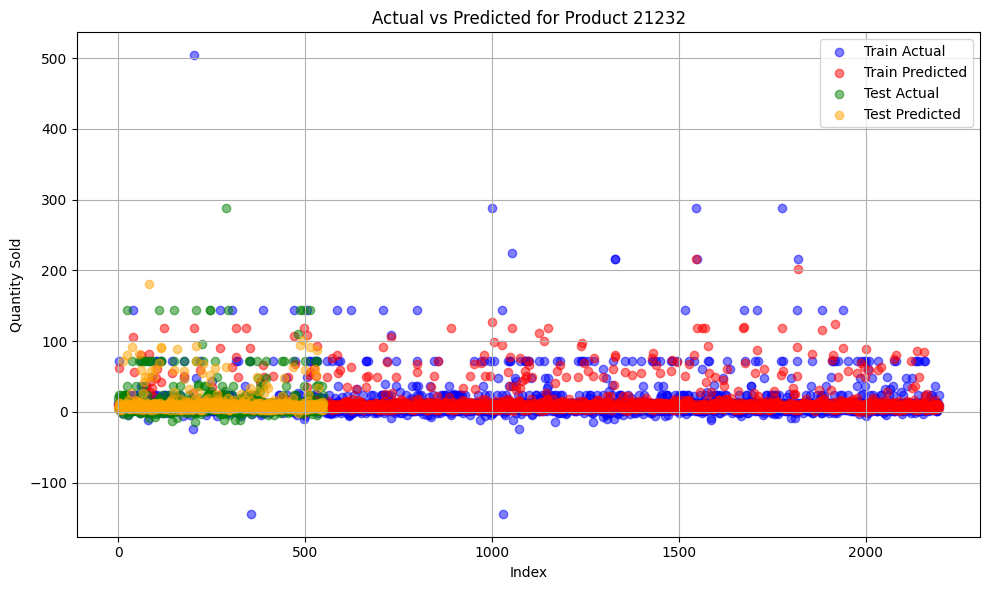

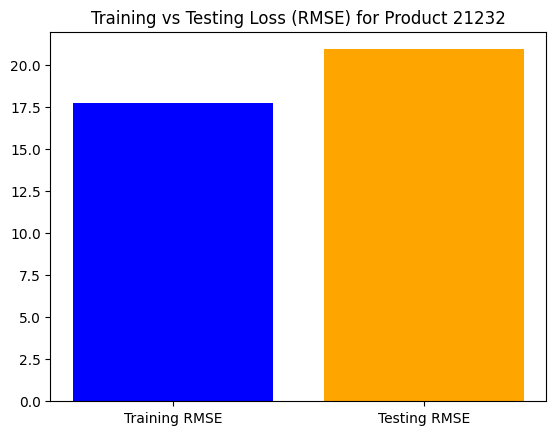

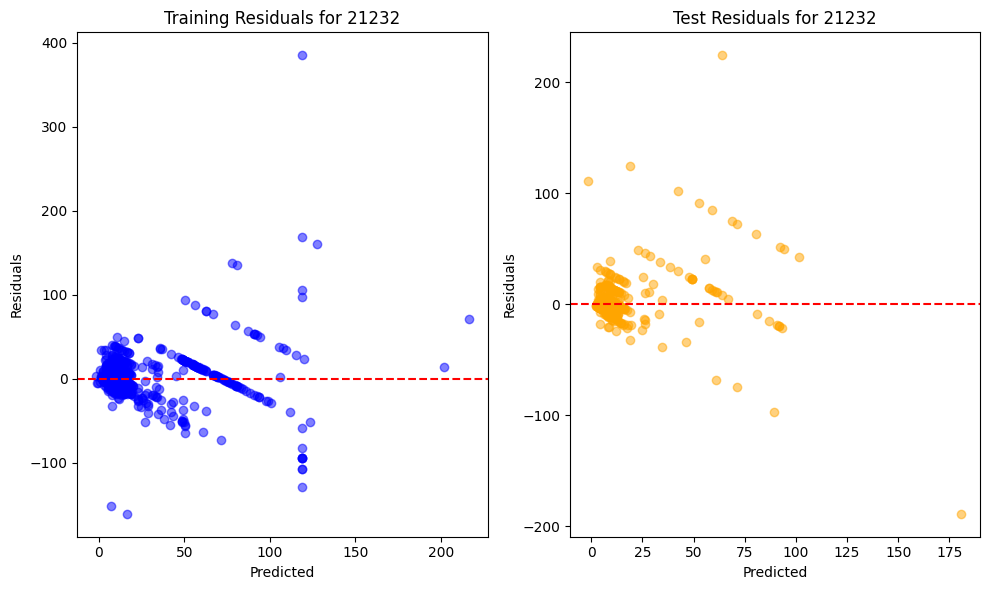

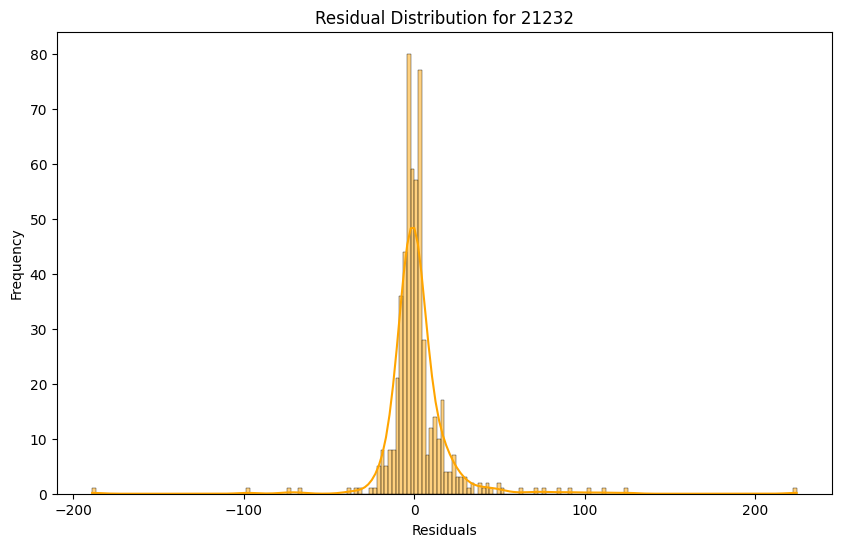

Processing product: 21756
21756 - RMSE (Train): 1.3112611563968144, RMSE (Test): 1.996159857539313
21756 - MAE (Train): 0.8802754687540459, MAE (Test): 1.2250556737605123


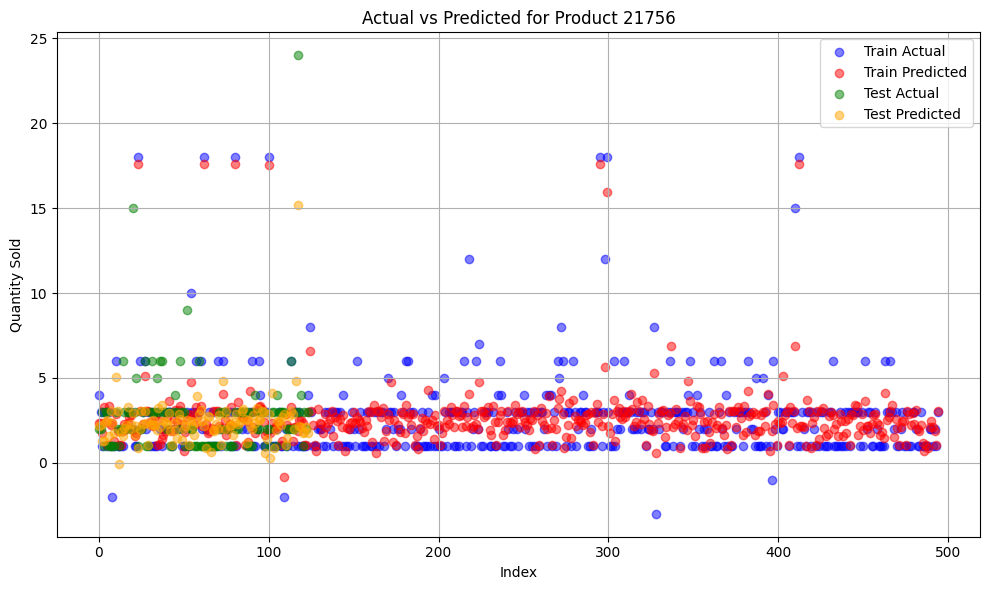

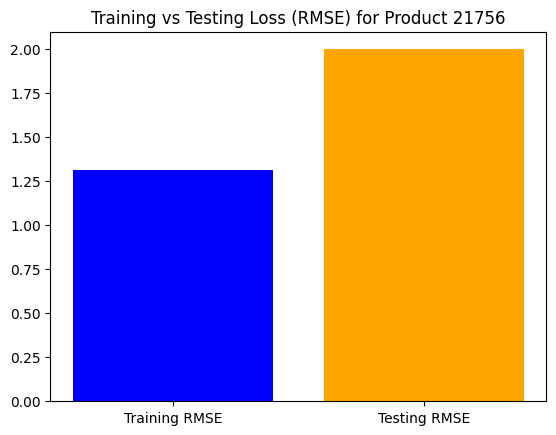

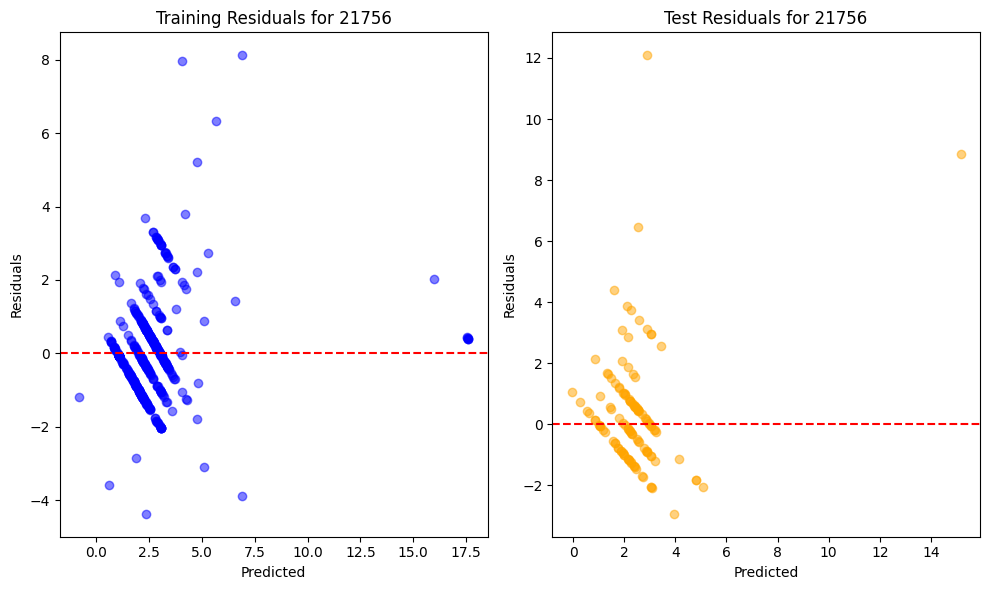

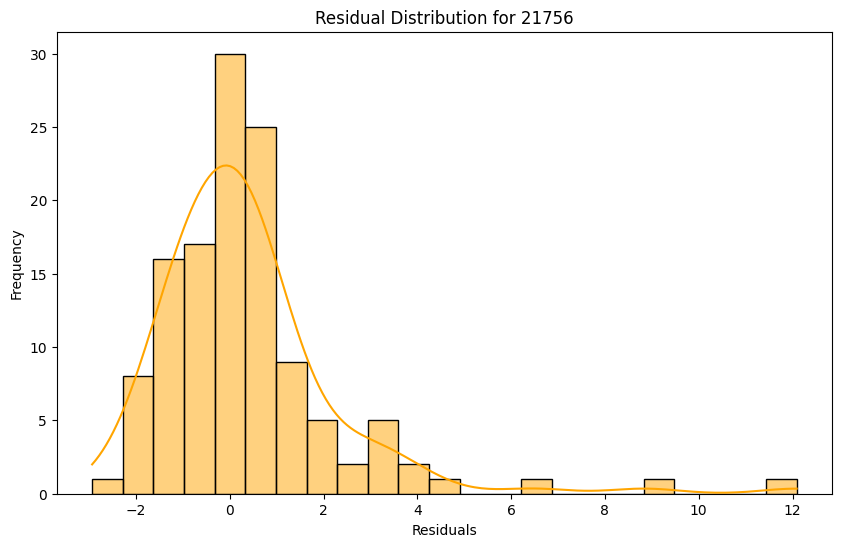

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load your datasets (replace with actual file paths if necessary)
customer_demo_path = '/Users/jai/Desktop/Soothsayer/Usecase_DemadForecasting1/CustomerDemographics.csv'
product_info_path = '/Users/jai/Desktop/Soothsayer/Usecase_DemadForecasting1/ProductInfo.csv'
transaction_01_path = '/Users/jai/Desktop/Soothsayer/Usecase_DemadForecasting1/Transactional_data_retail_01.csv'
transaction_02_path = '/Users/jai/Desktop/Soothsayer/Usecase_DemadForecasting1/Transactional_data_retail_02.csv'

# Load the datasets into dataframes
customer_demo_df = pd.read_csv(customer_demo_path)
product_info_df = pd.read_csv(product_info_path)
transaction_01_df = pd.read_csv(transaction_01_path)
transaction_02_df = pd.read_csv(transaction_02_path)

# Combine the two transactional datasets into one
df = pd.concat([transaction_01_df, transaction_02_df], ignore_index=True)

# Merge customer demographics to include Country information (if required)
df = df.merge(customer_demo_df[['Customer ID', 'Country']], on='Customer ID', how='left')

# Convert 'InvoiceDate' to datetime and extract useful features (like year, month, day)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day

# Assuming top_products contains the top 10 products by sales or other criteria
top_products = ['85123A', '71053', '84406B', '84029G', '85048', '79323P', '79323W', '22041', '21232', '21756']

# Best parameters from hyperparameter tuning
best_params = {
    'colsample_bytree': 0.7,
    'gamma': 0,
    'learning_rate': 0.2,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 50,
    'subsample': 0.7
}

# Iterate over each top product
for product_code in top_products:
    print(f"Processing product: {product_code}")

    # Filter data for the current product
    product_data = df[df['StockCode'] == product_code]

    # Drop irrelevant object columns like 'Invoice' and 'StockCode'
    product_data = product_data.drop(columns=['Invoice', 'StockCode', 'InvoiceDate'])

    # One-hot encode the 'Country' feature
    product_data_encoded = pd.get_dummies(product_data, columns=['Country'], drop_first=True)

    # Define features and target (use the encoded dataframe)
    features = [col for col in product_data_encoded.columns if col != 'Quantity']
    X = product_data_encoded[features]
    y = product_data_encoded['Quantity']

    # Create train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the XGBoost model using the best hyperparameters from tuning
    xgb_model = xgb.XGBRegressor(**best_params)



    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predictions on Training and Test Data
    y_pred_train = xgb_model.predict(X_train)
    y_pred_test = xgb_model.predict(X_test)

    # Evaluate the model
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    print(f"{product_code} - RMSE (Train): {rmse_train}, RMSE (Test): {rmse_test}")
    print(f"{product_code} - MAE (Train): {mae_train}, MAE (Test): {mae_test}")

    # Plot Actual vs Predicted for both training and test sets
    plt.figure(figsize=(10, 6))

    # Actual vs Predicted for Training data
    plt.scatter(range(len(y_train)), y_train, color='blue', label='Train Actual', alpha=0.5)
    plt.scatter(range(len(y_train)), y_pred_train, color='red', label='Train Predicted', alpha=0.5)

    # Actual vs Predicted for Test data
    plt.scatter(range(len(y_test)), y_test, color='green', label='Test Actual', alpha=0.5)
    plt.scatter(range(len(y_test)), y_pred_test, color='orange', label='Test Predicted', alpha=0.5)

    plt.title(f"Actual vs Predicted for Product {product_code}")
    plt.xlabel("Index")
    plt.ylabel("Quantity Sold")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Training and Testing Loss (RMSE)
    loss_values = [rmse_train, rmse_test]
    plt.bar(['Training RMSE', 'Testing RMSE'], loss_values, color=['blue', 'orange'])
    plt.title(f'Training vs Testing Loss (RMSE) for Product {product_code}')
    plt.show()

    # Residual Analysis
    residuals_train = y_train - y_pred_train
    residuals_test = y_test - y_pred_test

    plt.figure(figsize=(10, 6))

    # Plot residuals for training data
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred_train, residuals_train, alpha=0.5, color='blue')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"Training Residuals for {product_code}")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")

    # Plot residuals for testing data
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_test, residuals_test, alpha=0.5, color='orange')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"Test Residuals for {product_code}")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")

    plt.tight_layout()
    plt.show()

    # Plot Residual Distribution for Test Data
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals_test, kde=True, color='orange')
    plt.title(f"Residual Distribution for {product_code}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()


Processing product: 85123A
Cross-Validation RMSE Scores for 85123A: [4.42718799 4.46569716 4.43883304 4.45865489 4.43663333]
Average Cross-Validation RMSE for 85123A: 4.4454012800834715
85123A - XGBoost - RMSE (Train): 4.442561153100642, RMSE (Test): 4.323354283195841
85123A - XGBoost - MAE (Train): 3.3179519365939543, MAE (Test): 3.2101964344178855


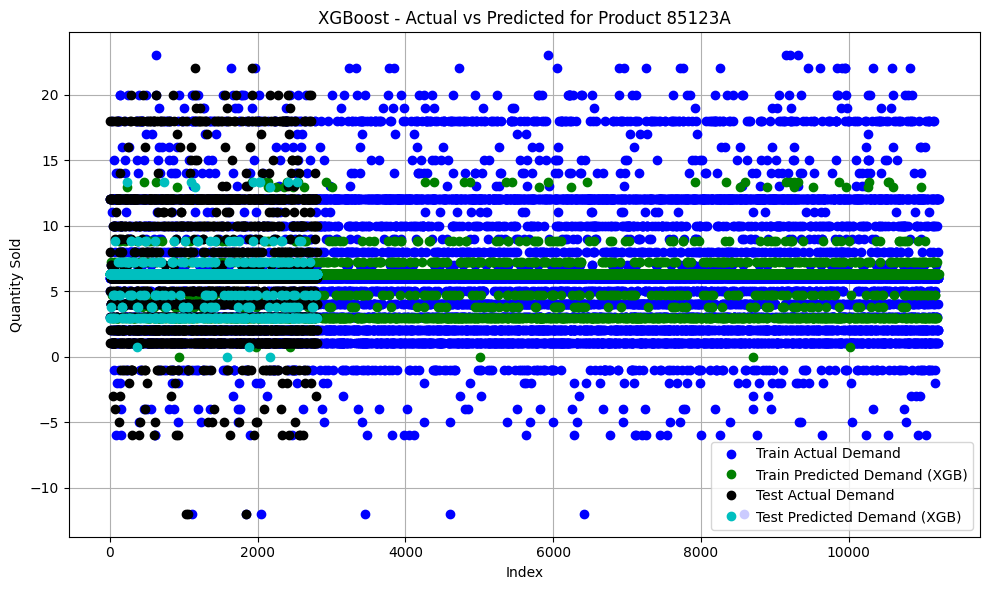

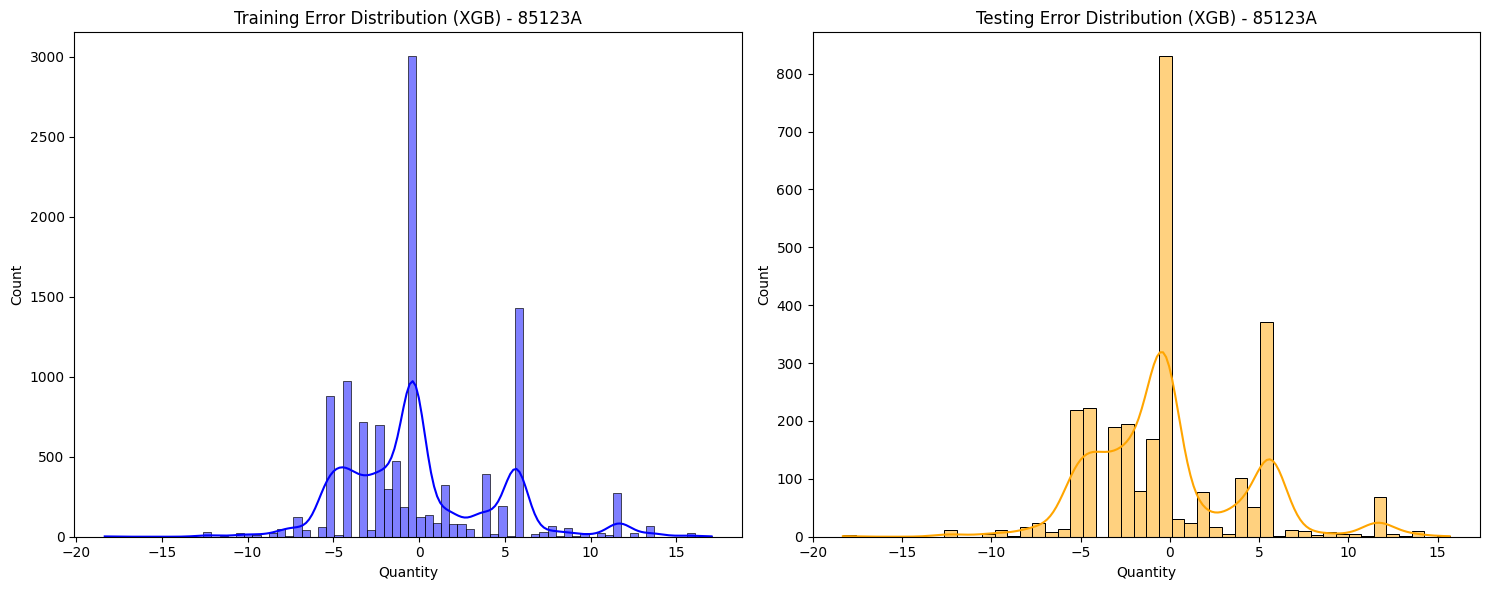

Processing product: 71053
Cross-Validation RMSE Scores for 71053: [2.65312372 2.96444932 2.83766915 2.59430705 2.58965203]
Average Cross-Validation RMSE for 71053: 2.7278402548948404
71053 - XGBoost - RMSE (Train): 2.719244008333287, RMSE (Test): 2.5934452733794107
71053 - XGBoost - MAE (Train): 1.8537875444740284, MAE (Test): 1.8481176275195497


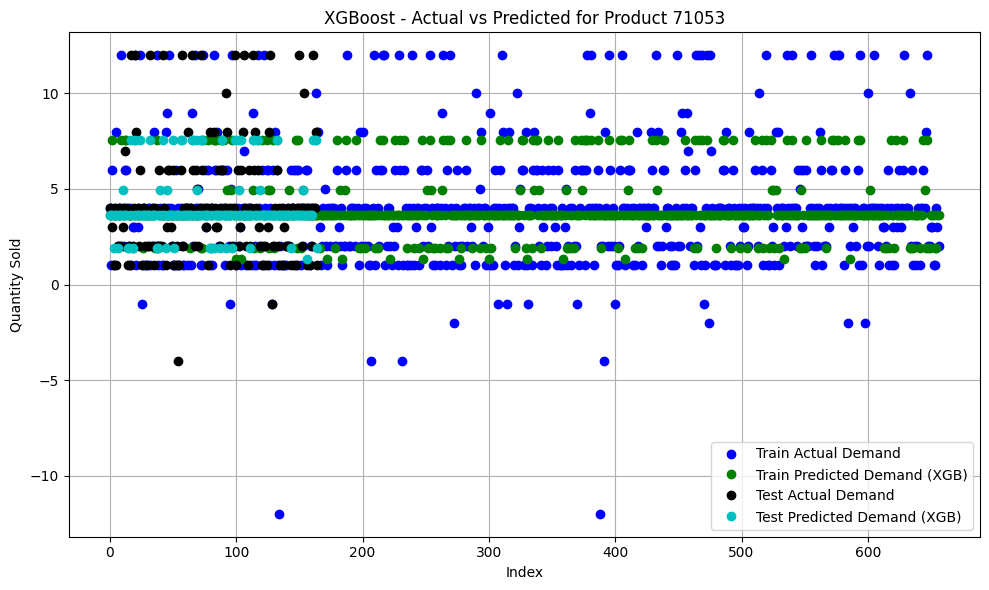

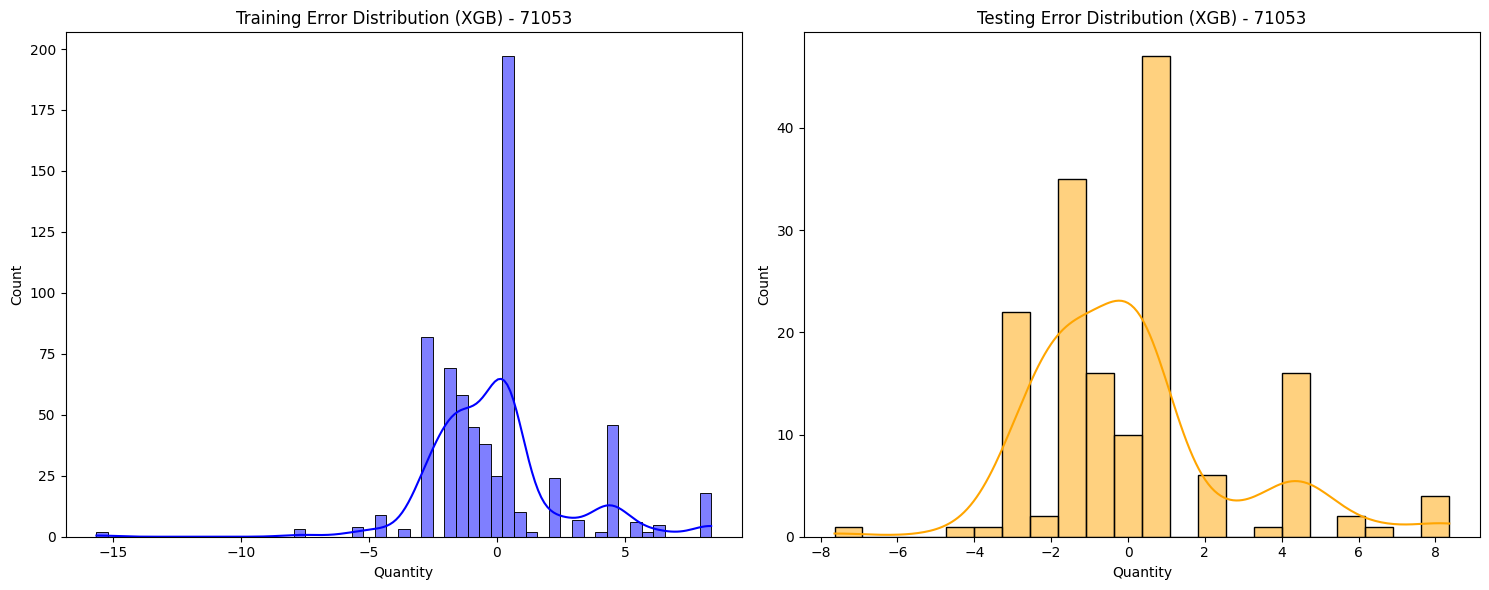

Processing product: 84406B
Cross-Validation RMSE Scores for 84406B: [3.53105103 3.51391063 3.39660184 3.5661892  3.65127766]
Average Cross-Validation RMSE for 84406B: 3.5318060733464294
84406B - XGBoost - RMSE (Train): 3.5275926946390195, RMSE (Test): 3.724733104305935
84406B - XGBoost - MAE (Train): 2.9504908597233905, MAE (Test): 3.0977941832807803


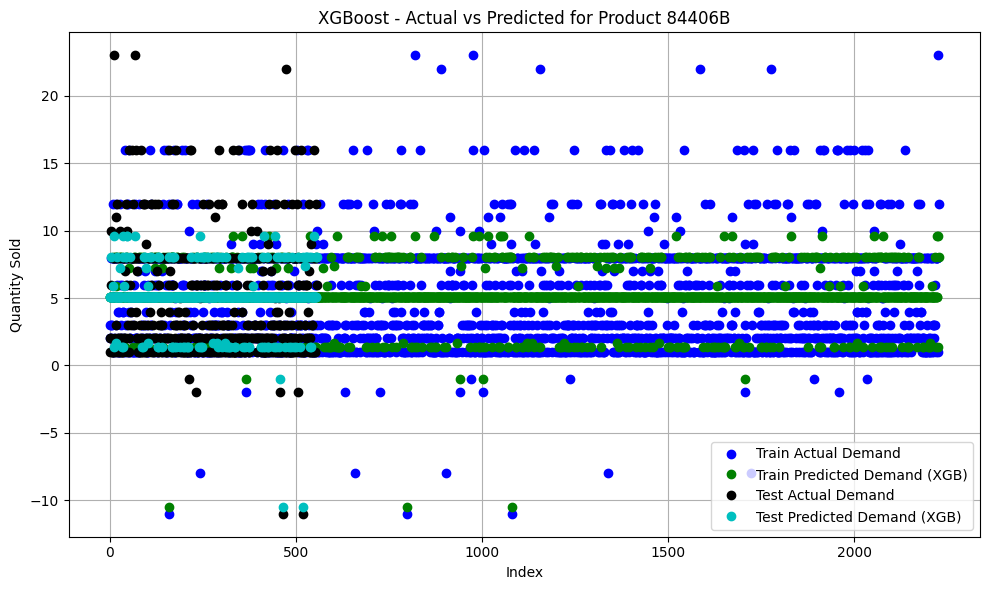

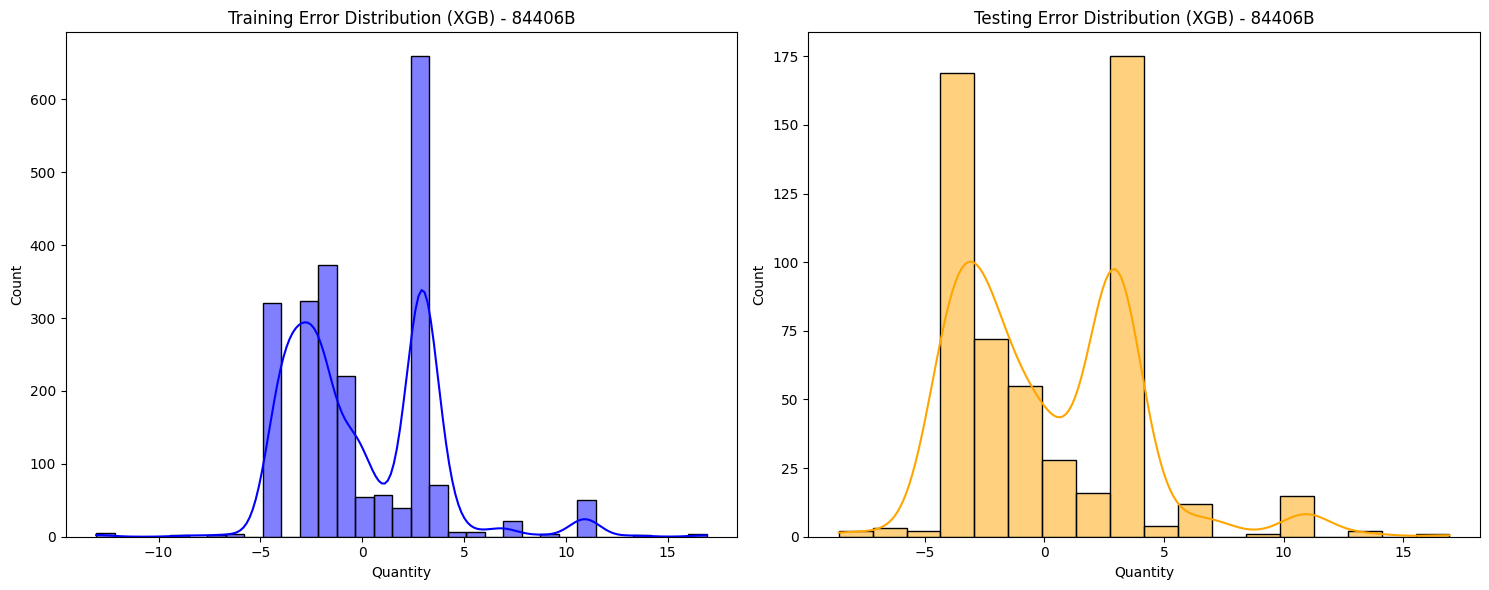

Processing product: 84029G
Cross-Validation RMSE Scores for 84029G: [2.28821088 3.00341142 2.82312963 2.74103333 3.14367719]
Average Cross-Validation RMSE for 84029G: 2.7998924906397007
84029G - XGBoost - RMSE (Train): 2.7661535746555583, RMSE (Test): 3.1120663285099592
84029G - XGBoost - MAE (Train): 1.9292660780395854, MAE (Test): 2.1475201696157455


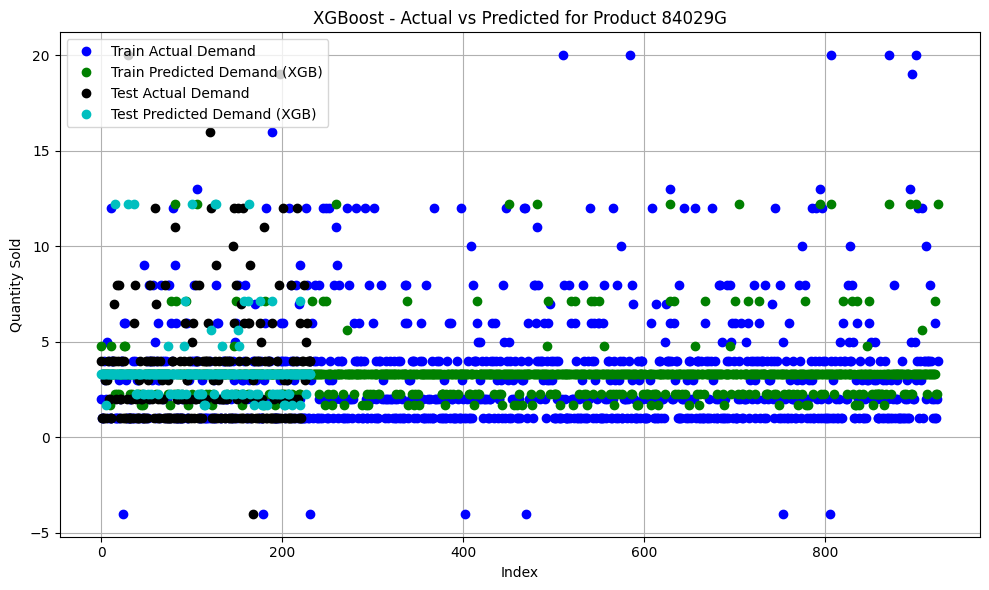

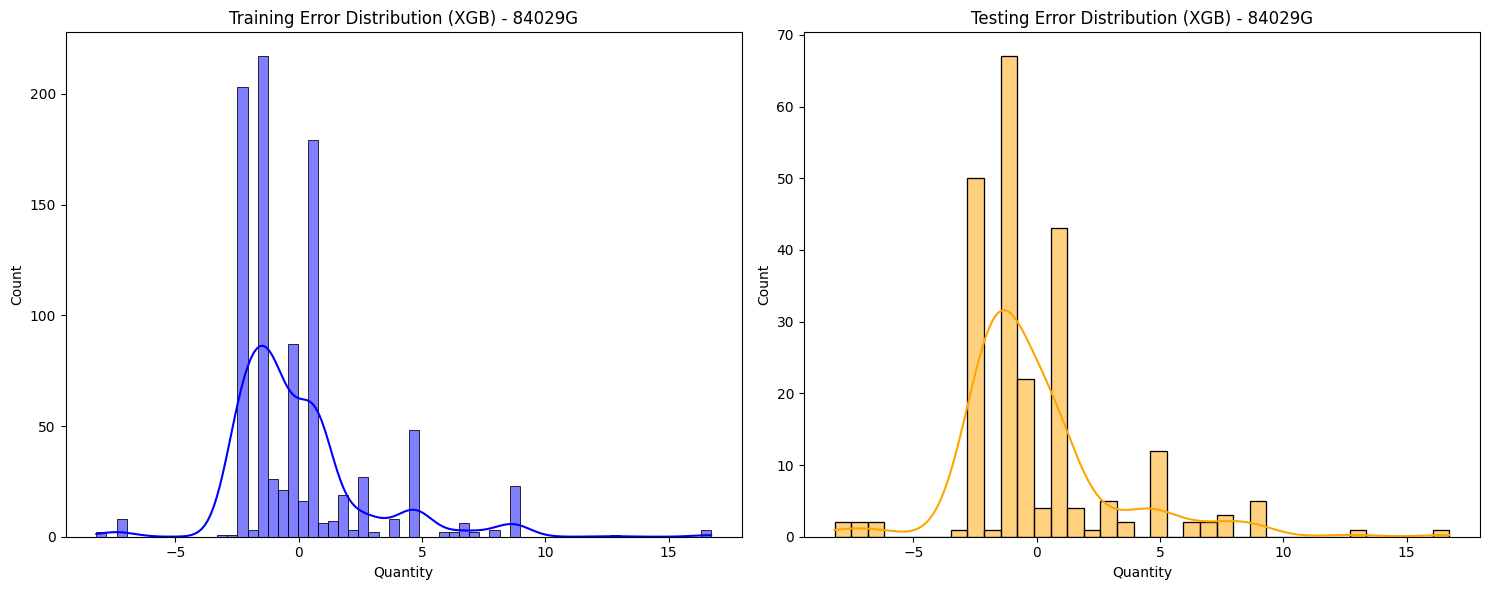

Processing product: 85048
Cross-Validation RMSE Scores for 85048: [4.69884493 3.0937544  3.59327869 2.97727721 3.33501567]
Average Cross-Validation RMSE for 85048: 3.53963418110353
85048 - XGBoost - RMSE (Train): 3.460016059288051, RMSE (Test): 2.5431291112168974
85048 - XGBoost - MAE (Train): 2.2880813739669157, MAE (Test): 1.8960339382842735


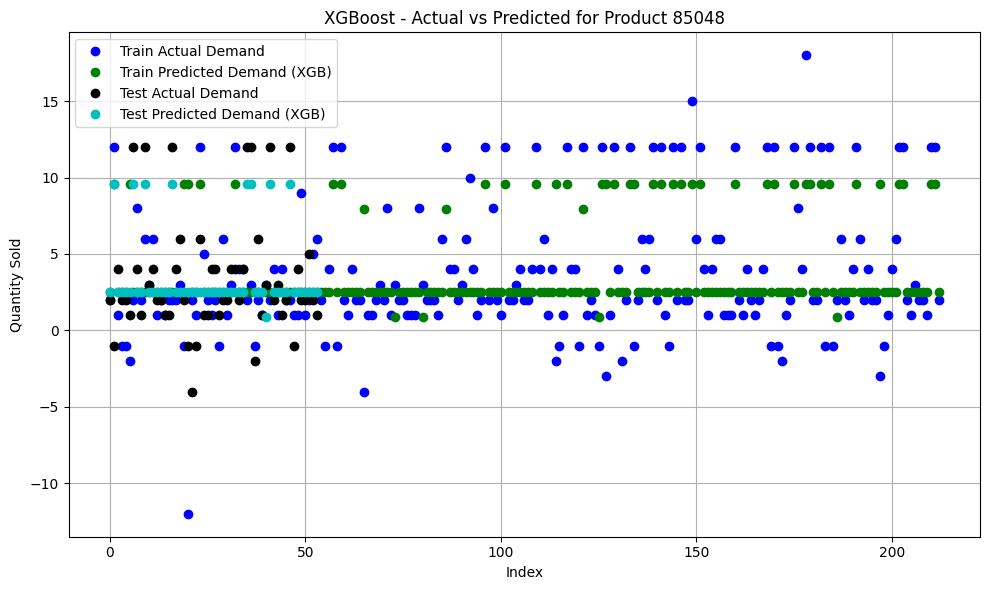

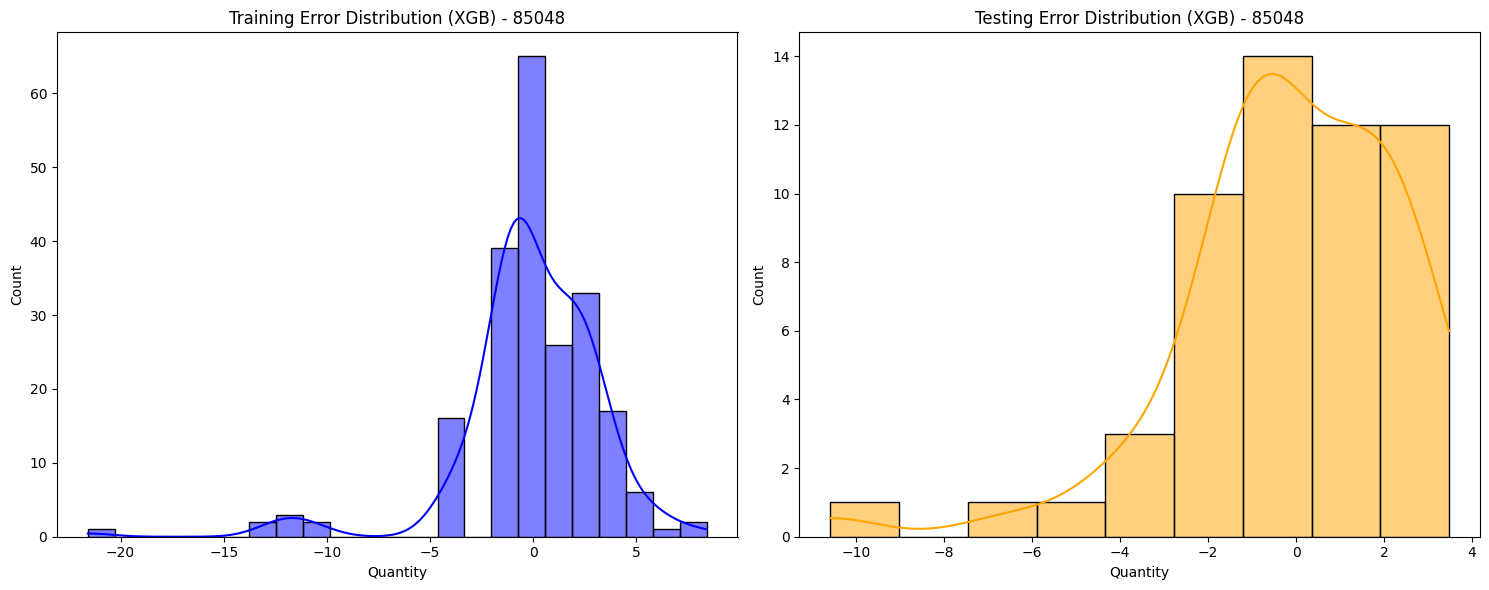

Processing product: 79323P
Cross-Validation RMSE Scores for 79323P: [4.29760129 4.43811714 4.68747813 4.62851098 3.81221477]
Average Cross-Validation RMSE for 79323P: 4.37278445971276
79323P - XGBoost - RMSE (Train): 4.358837723605579, RMSE (Test): 4.601395468390324
79323P - XGBoost - MAE (Train): 3.341169384809641, MAE (Test): 3.589123879487698


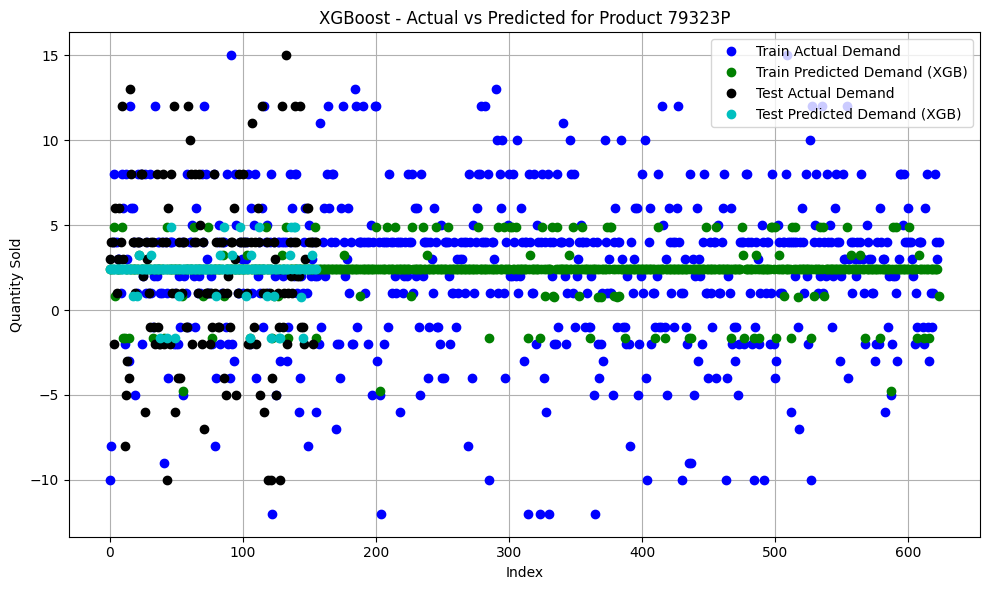

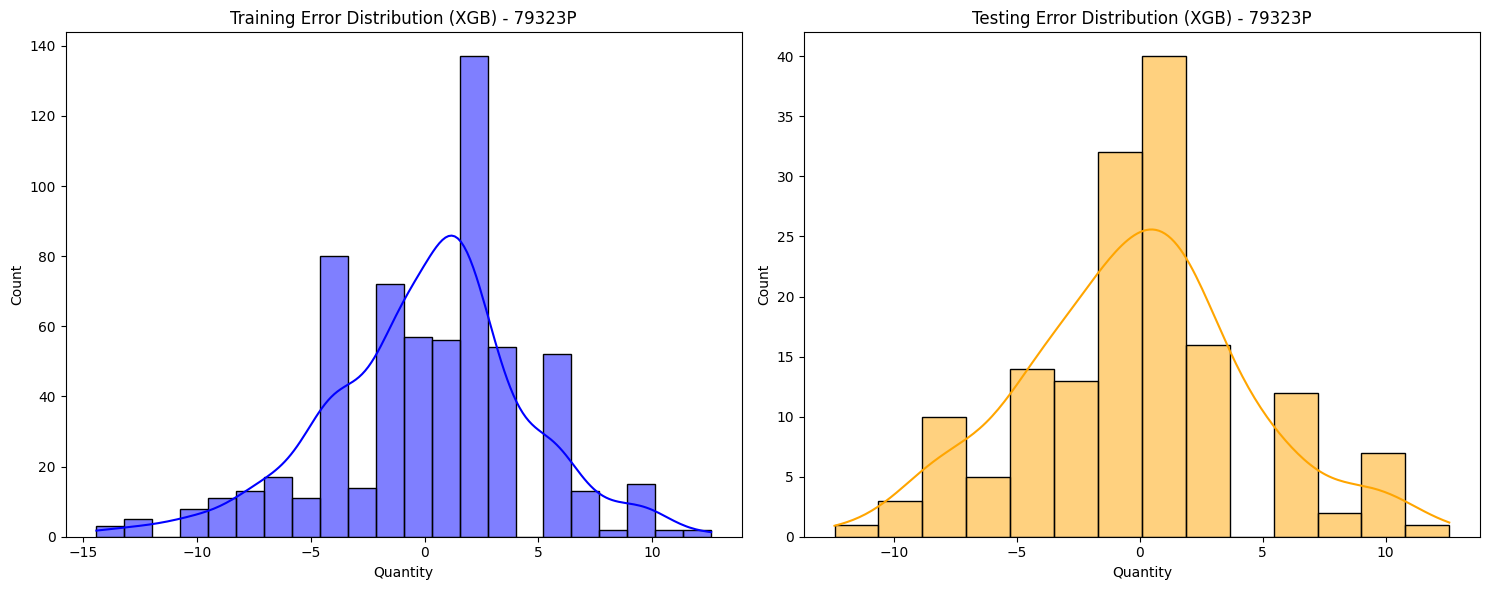

Processing product: 79323W
Cross-Validation RMSE Scores for 79323W: [5.48378044 4.93980878 5.62857103 4.35464708 4.72833103]
Average Cross-Validation RMSE for 79323W: 5.027027672761941
79323W - XGBoost - RMSE (Train): 5.019164391645403, RMSE (Test): 4.489171921386858
79323W - XGBoost - MAE (Train): 3.7464584067463873, MAE (Test): 3.2904730090073175


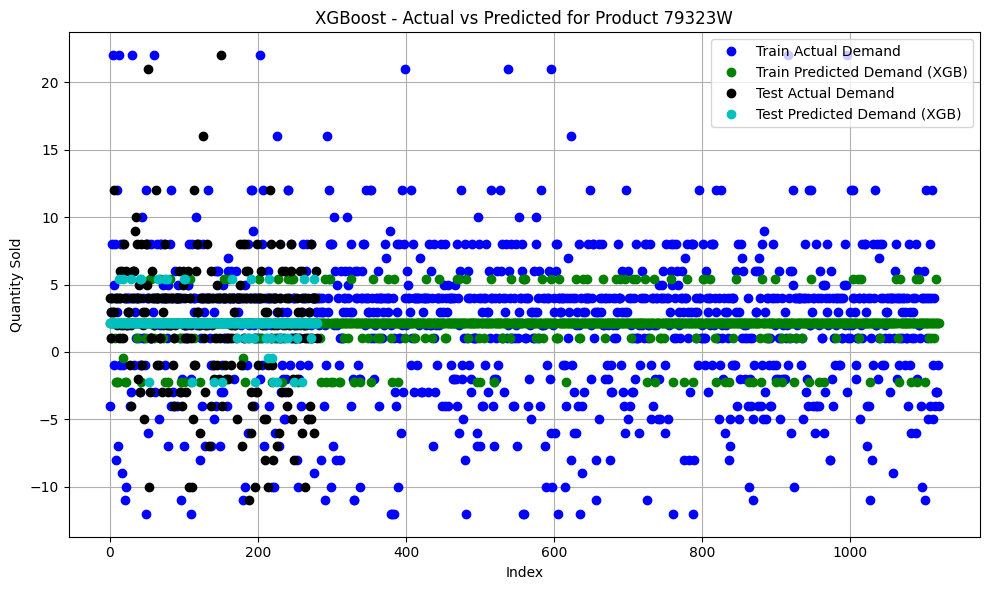

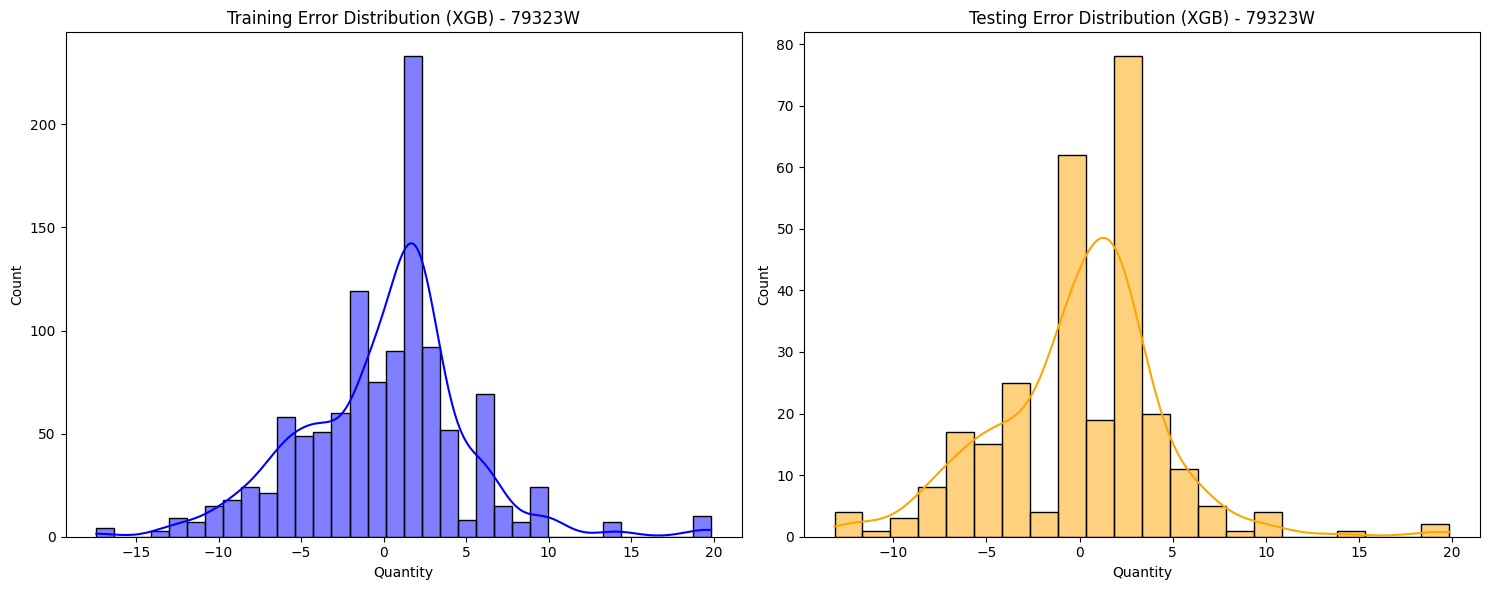

Processing product: 22041
Cross-Validation RMSE Scores for 22041: [3.32194607 2.89151587 3.45552104 2.77261534 2.35377415]
Average Cross-Validation RMSE for 22041: 2.9590744945254146
22041 - XGBoost - RMSE (Train): 2.866262488528563, RMSE (Test): 3.4149086325902456
22041 - XGBoost - MAE (Train): 1.9675083890441776, MAE (Test): 2.5905450221264


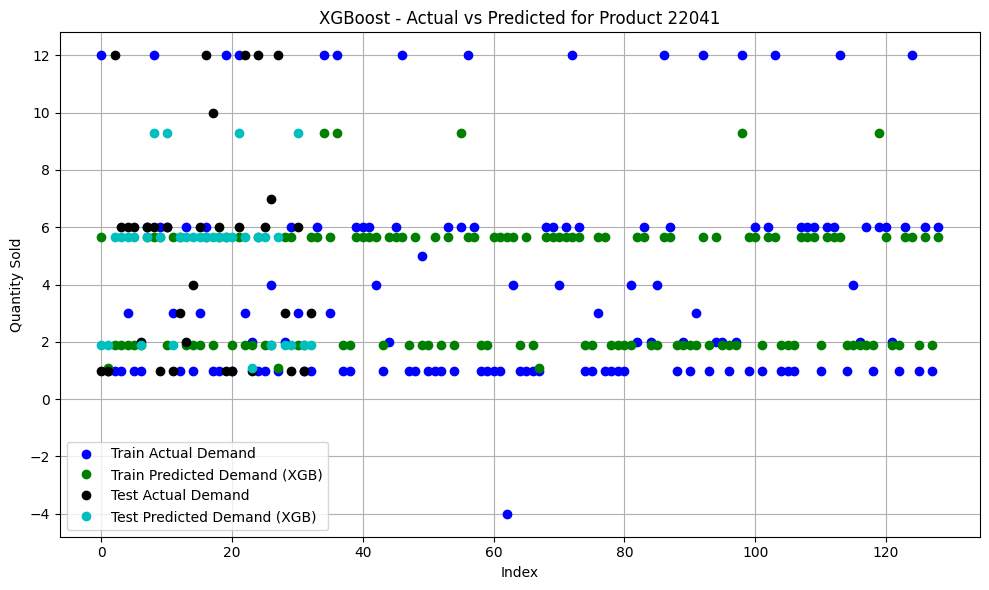

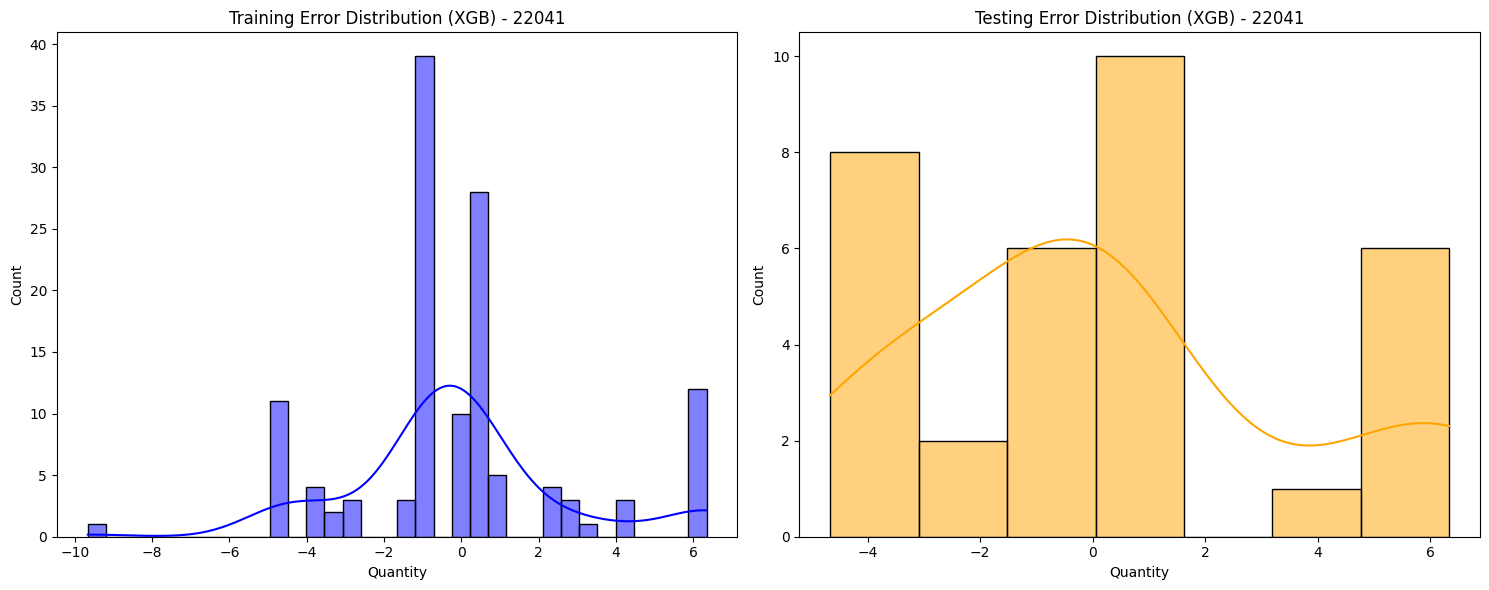

Processing product: 21232
Cross-Validation RMSE Scores for 21232: [5.31204029 5.16945703 5.52706613 5.21987295 5.15723847]
Average Cross-Validation RMSE for 21232: 5.277134975383371
21232 - XGBoost - RMSE (Train): 5.241356697646682, RMSE (Test): 5.219898365068443
21232 - XGBoost - MAE (Train): 4.488495480066666, MAE (Test): 4.495827740646507


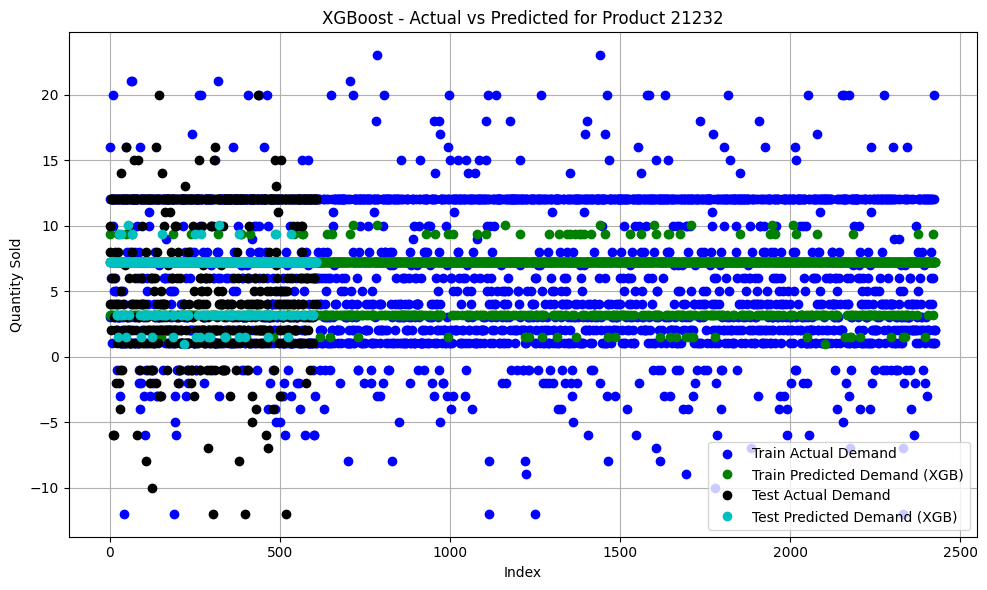

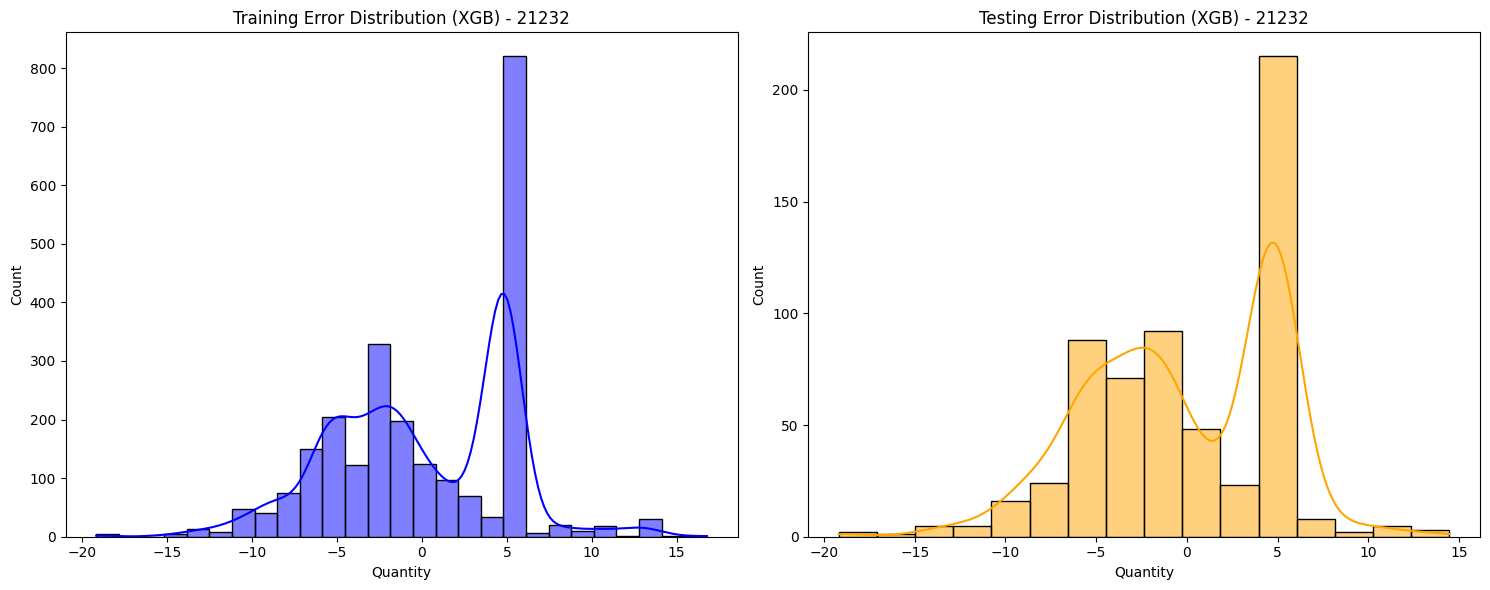

Processing product: 21756
Cross-Validation RMSE Scores for 21756: [1.66956665 2.39291144 1.33983382 2.42999661 2.38766946]
Average Cross-Validation RMSE for 21756: 2.0439955949144837
21756 - XGBoost - RMSE (Train): 1.7854879449823806, RMSE (Test): 1.670655521423428
21756 - XGBoost - MAE (Train): 1.2026448351641497, MAE (Test): 1.2130186448494593


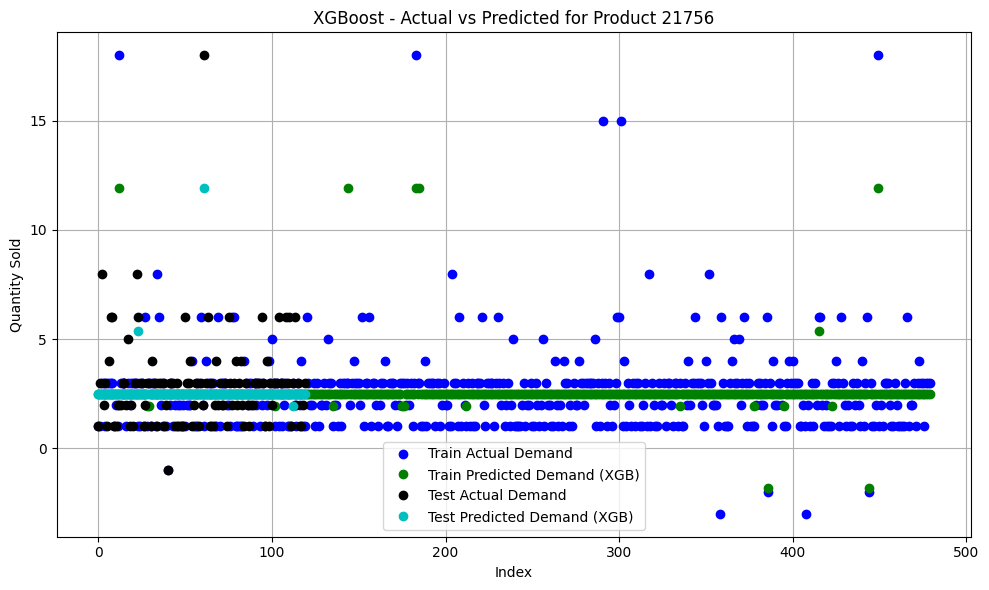

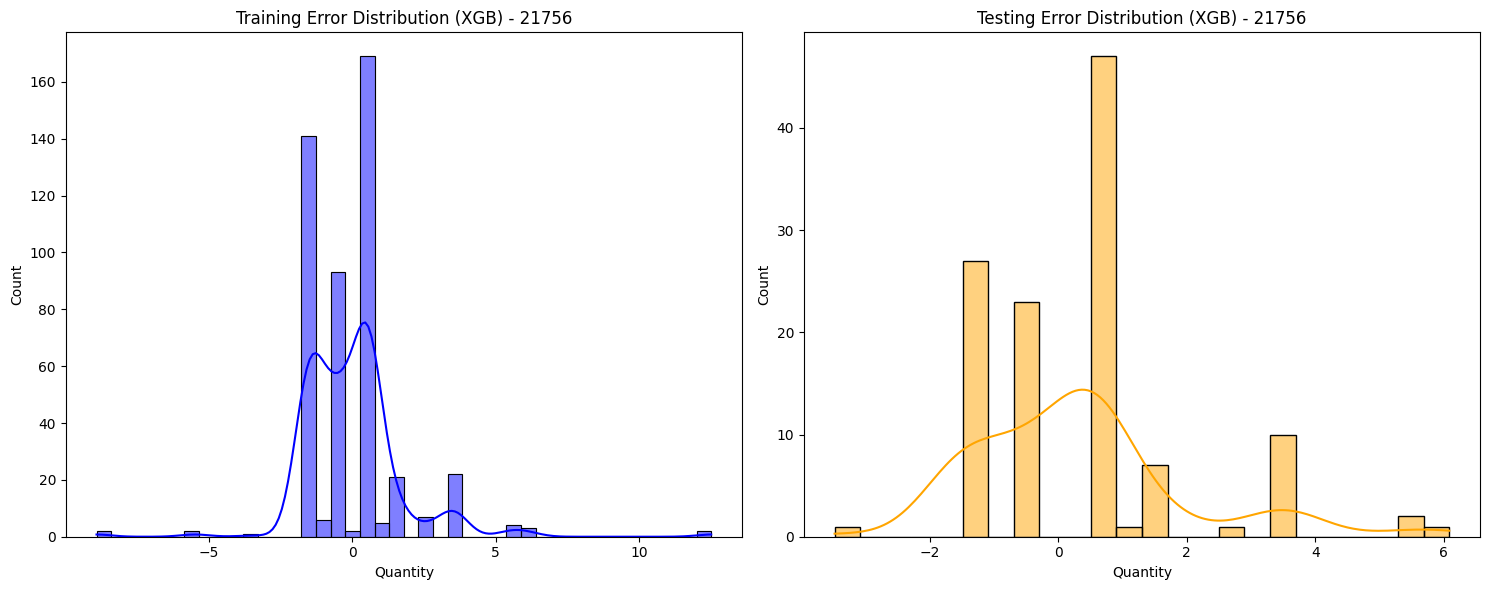

Best Parameters from GridSearchCV: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.7}
Best RMSE from GridSearchCV: 1.928603009627778


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Assuming top_products contains the top 10 products by sales
top_products = ['85123A', '71053', '84406B', '84029G', '85048', '79323P', '79323W', '22041', '21232', '21756']

# Apply one-hot encoding to categorical variables like StockCode and Country (if available)
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Iterate through each top product
for product_code in top_products:
    print(f"Processing product: {product_code}")

    # Assuming 'filtered_df' is your dataset containing all necessary product and sales data
    product_sales = filtered_df[filtered_df['StockCode'] == product_code]

    # Feature engineering (replace with actual feature columns like Price, Country, etc.)
    features = ['Price', 'Country']  # Add relevant features
    target = 'Quantity'

    # One-hot encode the categorical features
    X_encoded = onehot_encoder.fit_transform(product_sales[['Country']])
    X_encoded_df = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(['Country']))

    # Combine with numerical features (like Price)
    X_numerical = product_sales[['Price']].reset_index(drop=True)
    X = pd.concat([X_numerical, X_encoded_df], axis=1)

    # Target variable
    y = product_sales[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

    # Initialize the XGBoost model with regularization (reg_alpha and reg_lambda)
    xgb_model = XGBRegressor(
        colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3,
        min_child_weight=1, n_estimators=50, subsample=0.7,
        reg_alpha=0.1, reg_lambda=1.0, random_state=42
    )

    # Perform cross-validation with 5 folds
    cv_rmse_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(f"Cross-Validation RMSE Scores for {product_code}:", -cv_rmse_scores)
    print(f"Average Cross-Validation RMSE for {product_code}:", -cv_rmse_scores.mean())

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict using XGBoost
    y_pred_train_xgb = xgb_model.predict(X_train)
    y_pred_test_xgb = xgb_model.predict(X_test)

    # Calculate error metrics (for evaluation)
    rmse_xgb_train = mean_squared_error(y_train, y_pred_train_xgb, squared=False)
    rmse_xgb_test = mean_squared_error(y_test, y_pred_test_xgb, squared=False)
    mae_xgb_train = mean_absolute_error(y_train, y_pred_train_xgb)
    mae_xgb_test = mean_absolute_error(y_test, y_pred_test_xgb)

    print(f"{product_code} - XGBoost - RMSE (Train): {rmse_xgb_train}, RMSE (Test): {rmse_xgb_test}")
    print(f"{product_code} - XGBoost - MAE (Train): {mae_xgb_train}, MAE (Test): {mae_xgb_test}")

    # Plot the actual vs predicted demand for XGBoost
    plt.figure(figsize=(10, 6))

    plt.plot(range(len(y_train)), y_train, 'bo', label='Train Actual Demand')
    plt.plot(range(len(y_train)), y_pred_train_xgb, 'go', label='Train Predicted Demand (XGB)')

    plt.plot(range(len(y_test)), y_test, 'ko', label='Test Actual Demand')
    plt.plot(range(len(y_test)), y_pred_test_xgb, 'co', label='Test Predicted Demand (XGB)')

    plt.title(f"XGBoost - Actual vs Predicted for Product {product_code}")
    plt.xlabel("Index")
    plt.ylabel("Quantity Sold")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Error distribution plots
    plt.figure(figsize=(15, 6))

    # Training error distribution
    plt.subplot(1, 2, 1)
    train_errors_xgb = y_train - y_pred_train_xgb
    sns.histplot(train_errors_xgb, kde=True, color='blue')
    plt.title(f'Training Error Distribution (XGB) - {product_code}')

    # Testing error distribution
    plt.subplot(1, 2, 2)
    test_errors_xgb = y_test - y_pred_test_xgb
    sns.histplot(test_errors_xgb, kde=True, color='orange')
    plt.title(f'Testing Error Distribution (XGB) - {product_code}')

    plt.tight_layout()
    plt.show()

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'reg_alpha': [0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1]
}

# Performing hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best RMSE from GridSearchCV:", -grid_search.best_score_)
